In [1]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# read csv file and display
# df1=pd.read_csv(r"C:\Users\mariy\Downloads\loan_data.csv")
df1=pd.read_csv("loan.csv")
df1.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   
4                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   
4       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [2]:
# row and column size
df1.shape

(39717, 111)

In [3]:
# to get columns with na values
df1.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [4]:
# drop columns with all values as na
df=df1.dropna(how='all',axis=1)

In [5]:
# row and column size
df.shape

(39717, 57)

In [6]:
# Checking for duplicate rows
df[df.duplicated()]

# no duplicate rows

Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 57 columns]

In [7]:
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [8]:
df.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [9]:
# for the columns, 'next_pymnt_d', 'mths_since_last_record', more than 90% of the values are NA.
# The columns inq_last_6mths,member_id,revol_bal,revol_util,url are not valid for the present analysis as these are needed after loan has been allotted.
# Hence, these columns can be removed.
# The columns pub_rec and pub_rec_bankruptcies can be removed as most values are 0.

df2=df.drop(['mths_since_last_record','next_pymnt_d','inq_last_6mths','member_id','revol_bal','revol_util','url','pub_rec','pub_rec_bankruptcies'],axis=1)

In [10]:
df2.shape

(39717, 48)

In [11]:
# List of columns having very few unqiue values
print(df2.nunique().sort_values(ascending=True))

tax_liens                         1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
delinq_amnt                       1
pymnt_plan                        1
term                              2
loan_status                       3
verification_status               3
home_ownership                    5
grade                             7
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
mths_since_last_delinq           95
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                        371
earliest_cr_line                526
zip_code                    

In [12]:
df2=df2.loc[:,df2.nunique()>1]
df2.shape

(39717, 39)

In [13]:
df2.drop(df2[df2['loan_status']=='Current'].index,inplace=True)

In [14]:
df2.shape

(38577, 39)

In [15]:
# Analysiying variable zip_code
df2['zip_code'].value_counts()

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64

In [16]:
# Since value of pincodes have xx, removing the xx 

df2['zip_code']=df2['zip_code'].apply(lambda x:x[:-2])
df2['zip_code'].value_counts()

100    583
945    531
112    502
606    493
070    455
      ... 
463      1
381      1
592      1
414      1
469      1
Name: zip_code, Length: 822, dtype: int64

In [17]:
# Checking terms variable for values (since values can be only 36 or 60 months)

df2['term'].value_counts()

 36 months    29096
 60 months     9481
Name: term, dtype: int64

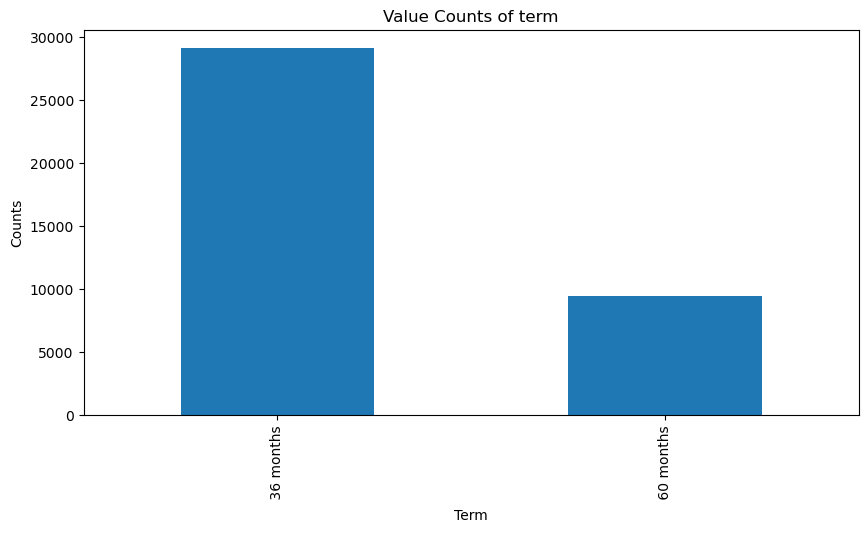

In [18]:
value_counts = df2['term'].value_counts()

plt.figure(figsize=(10,5))
value_counts.plot(kind='bar')
plt.title('Value Counts of term')
plt.xlabel('Term')
plt.ylabel('Counts')
plt.show()

In [19]:
df2.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
mths_since_last_delinq     float64
open_acc                     int64
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

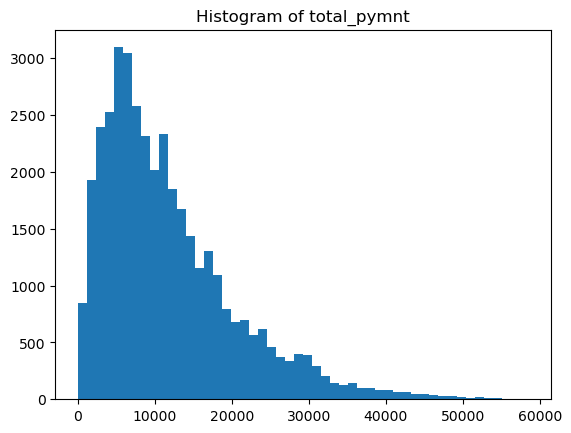

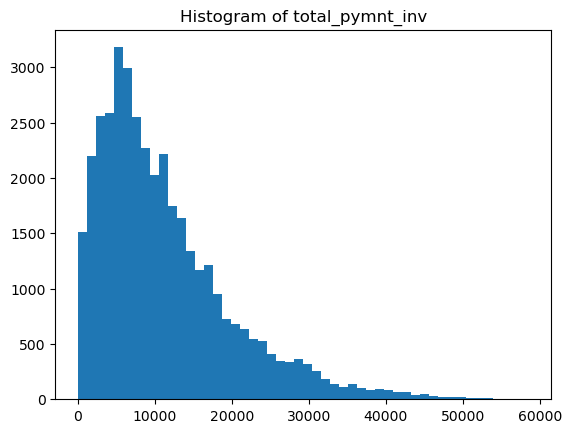

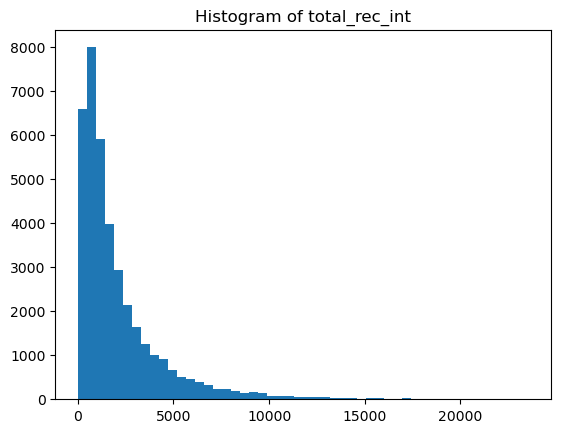

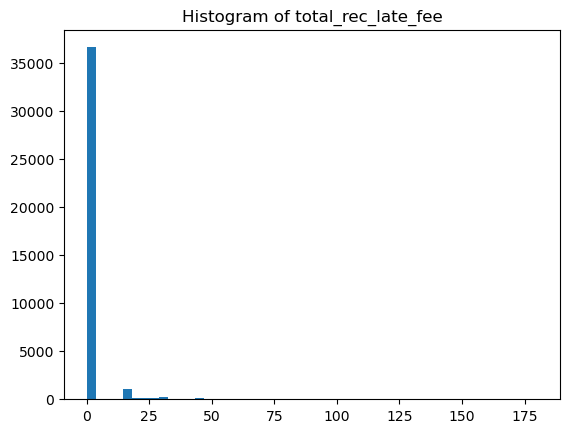

In [20]:
# convert total_pymnt_inv to numeric since it is amount
df2['total_pymnt']=pd.to_numeric(df2['total_pymnt'])
plt.hist(df2['total_pymnt'], bins=50)
plt.title('Histogram of total_pymnt')
plt.show()

# convert total_pymnt_inv to numeric since it is amount
df2['total_pymnt_inv']=pd.to_numeric(df2['total_pymnt_inv'])
plt.hist(df2['total_pymnt_inv'], bins=50)
plt.title('Histogram of total_pymnt_inv')
plt.show()

# convert total_rec_int to numeric since it is amount
df2['total_rec_int']=pd.to_numeric(df2['total_rec_int'])
plt.hist(df2['total_rec_int'], bins=50)
plt.title('Histogram of total_rec_int')
plt.show()

# convert total_rec_late_fee to numeric since it is amount
df2['total_rec_late_fee']=pd.to_numeric(df2['total_rec_late_fee'])
plt.hist(df2['total_rec_late_fee'], bins=50)
plt.title('Histogram of total_rec_late_fee')
plt.show()

In [21]:
df2.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
desc                        object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
mths_since_last_delinq     float64
open_acc                     int64
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

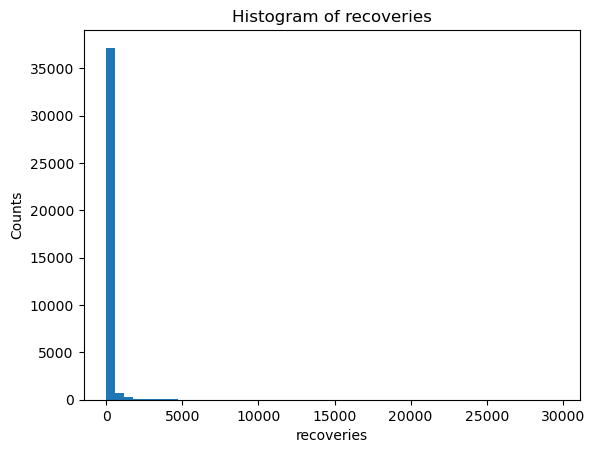

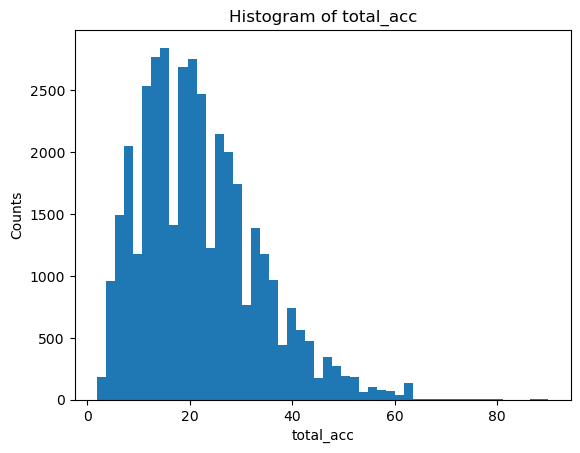

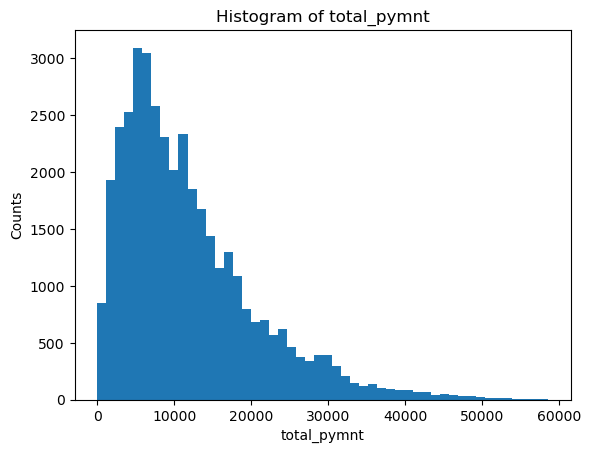

In [22]:
# checking values of recoveries variable
plt.hist(df2['recoveries'], bins=50)
plt.title('Histogram of recoveries')
plt.xlabel('recoveries')
plt.ylabel('Counts')
plt.show()

# checking values of total_acc variable
plt.hist(df2['total_acc'], bins=50)
plt.title('Histogram of total_acc')
plt.xlabel('total_acc')
plt.ylabel('Counts')
plt.show()

# checking values of total_pymnt
plt.hist(df2['total_pymnt'], bins=50)
plt.title('Histogram of total_pymnt')
plt.xlabel('total_pymnt')
plt.ylabel('Counts')
plt.show()

In [23]:
# checking values of verification_status variable
df2['verification_status'].value_counts()

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64

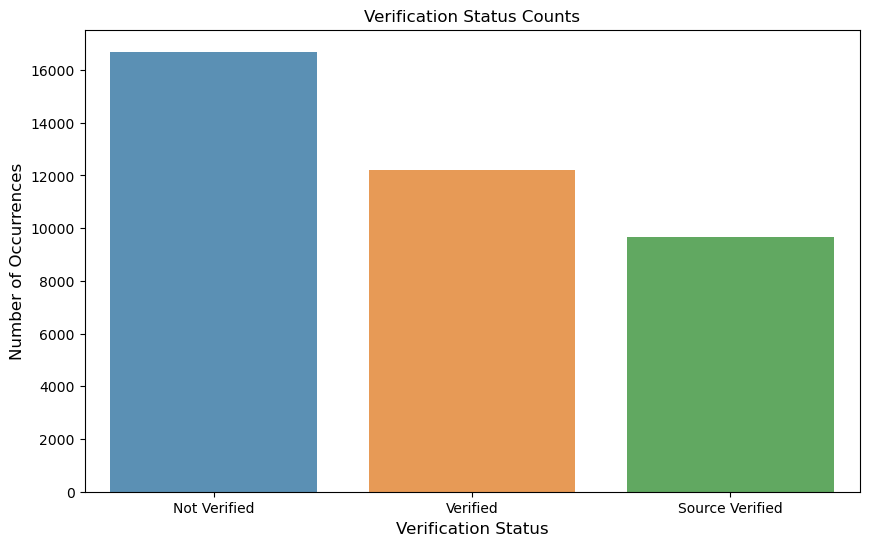

In [24]:
counts = df2['verification_status'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='verification_status', data=counts, alpha=0.8)

plt.title('Verification Status Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Verification Status', fontsize=12)

plt.show()

In [25]:
# checking values of loan_status variable
df2['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

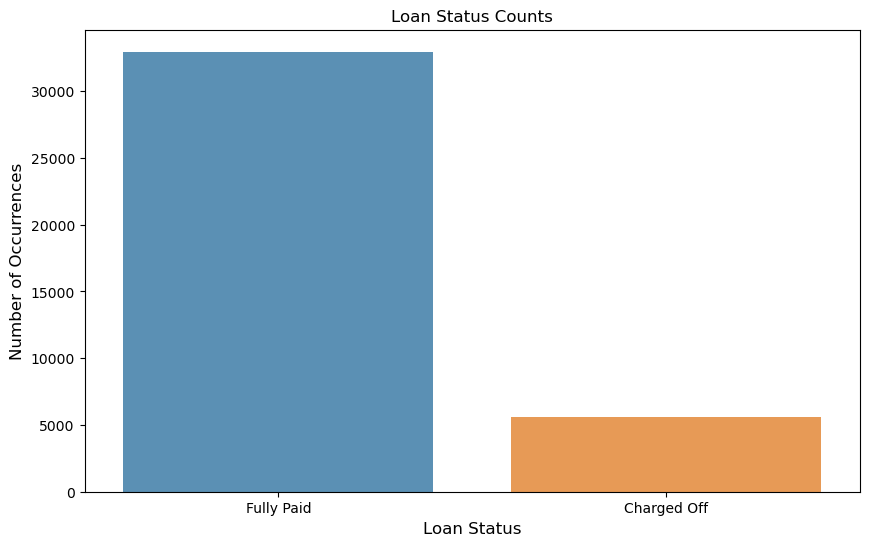

In [26]:
# checking values of loan_status variable

counts = df2['loan_status'].value_counts().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='loan_status', data=counts, alpha=0.8)

plt.title('Loan Status Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)

plt.show()

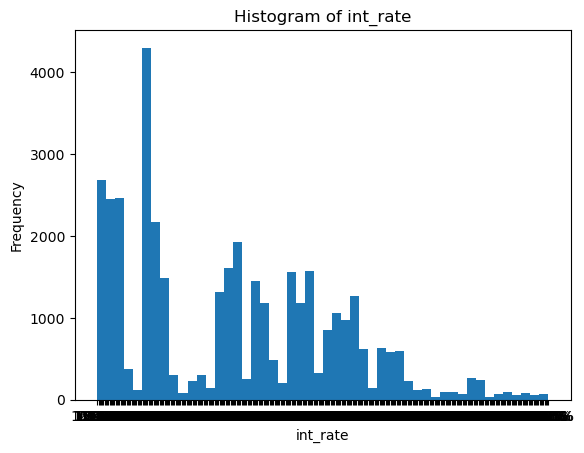

In [27]:
value_counts = df2['int_rate'].value_counts()

plt.hist(df2['int_rate'], bins=50)
plt.title('Histogram of int_rate')
plt.xlabel('int_rate')
plt.ylabel('Frequency')
plt.show()

In [28]:
df2['int_rate'] = df2['int_rate'].str.rstrip('%').astype('float')

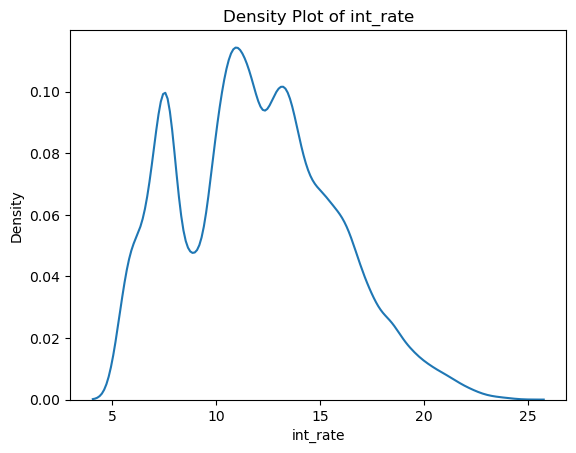

In [29]:
sns.kdeplot(df2['int_rate'])
plt.title('Density Plot of int_rate')
plt.show()

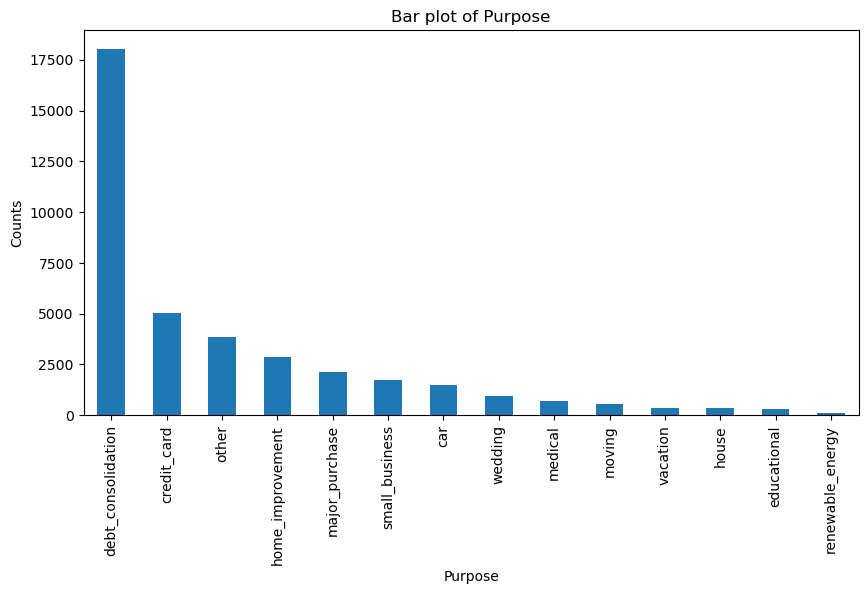

In [30]:
df2['purpose']


plt.figure(figsize=(10,5))
df2['purpose'].value_counts().plot(kind='bar')
plt.title('Bar plot of Purpose')
plt.xlabel('Purpose')
plt.ylabel('Counts')
plt.show()

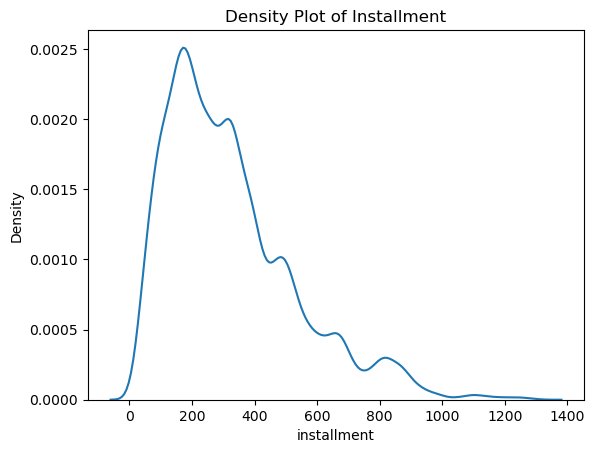

In [31]:
sns.kdeplot(df2['installment'])
plt.title('Density Plot of Installment')
plt.show()

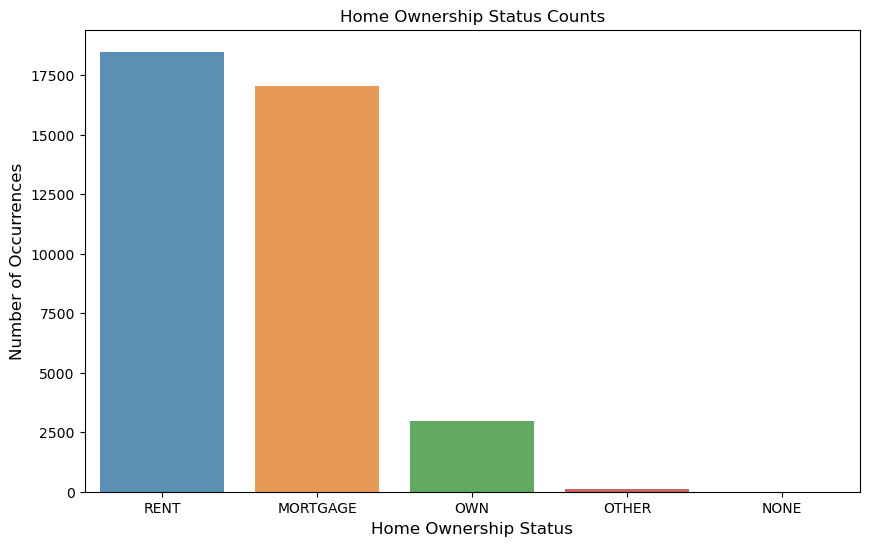

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='home_ownership', 
            data=df2['home_ownership'].value_counts().reset_index(), 
            alpha=0.8)

plt.title('Home Ownership Status Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Home Ownership Status', fontsize=12)

plt.show()

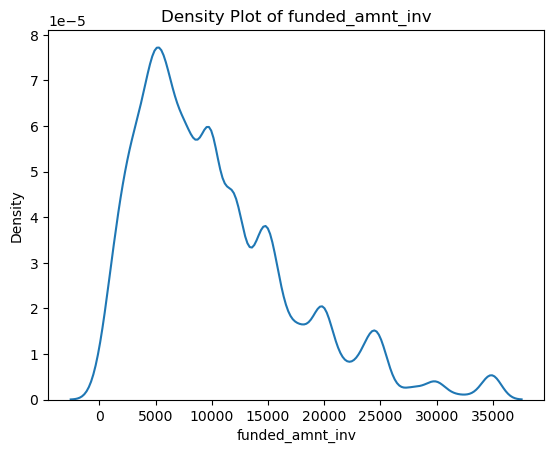

In [33]:
sns.kdeplot(df2['funded_amnt_inv'])
plt.title('Density Plot of funded_amnt_inv')
plt.show()

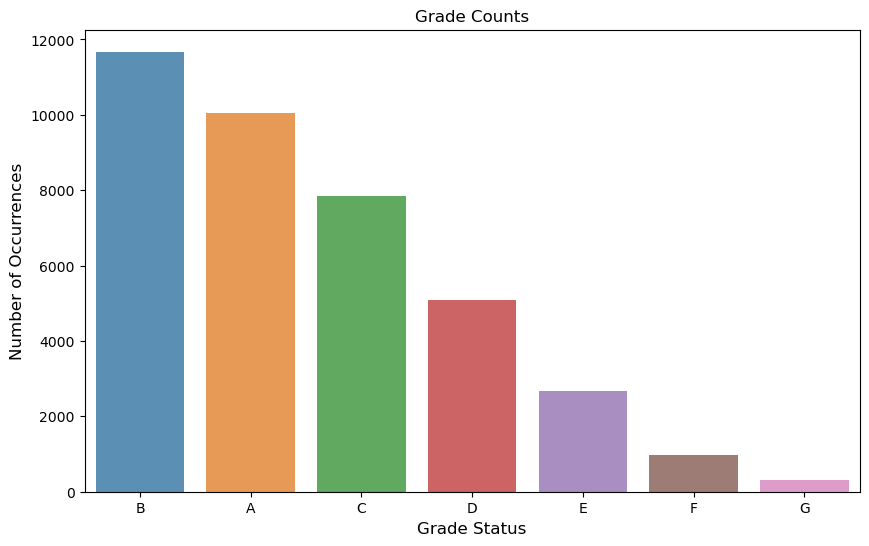

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='grade', 
            data=df2['grade'].value_counts().reset_index(), 
            alpha=0.8)

plt.title('Grade Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Grade Status', fontsize=12)

plt.show()

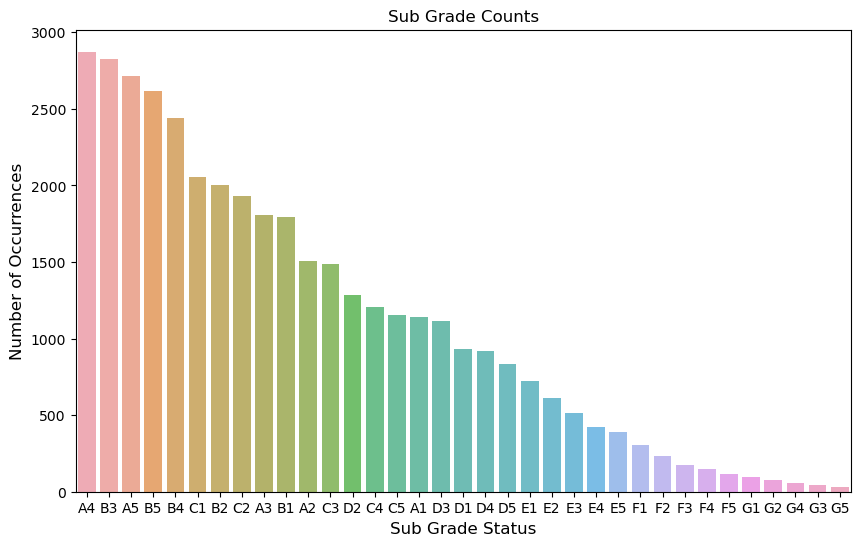

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='sub_grade', 
            data=df2['sub_grade'].value_counts().reset_index(), 
            alpha=0.8)

plt.title('Sub Grade Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Sub Grade Status', fontsize=12)

plt.show()

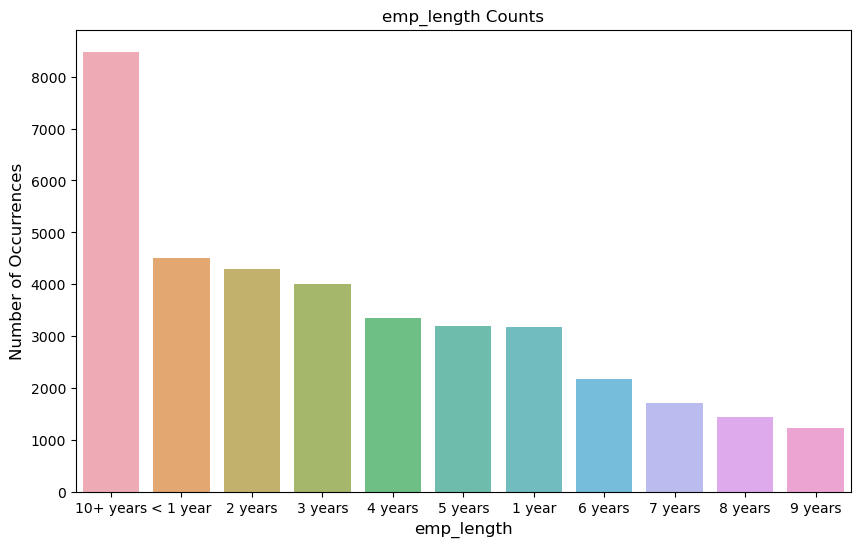

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='emp_length', 
            data=df2['emp_length'].value_counts().reset_index(), 
            alpha=0.8)

plt.title('emp_length Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('emp_length', fontsize=12)

plt.show()

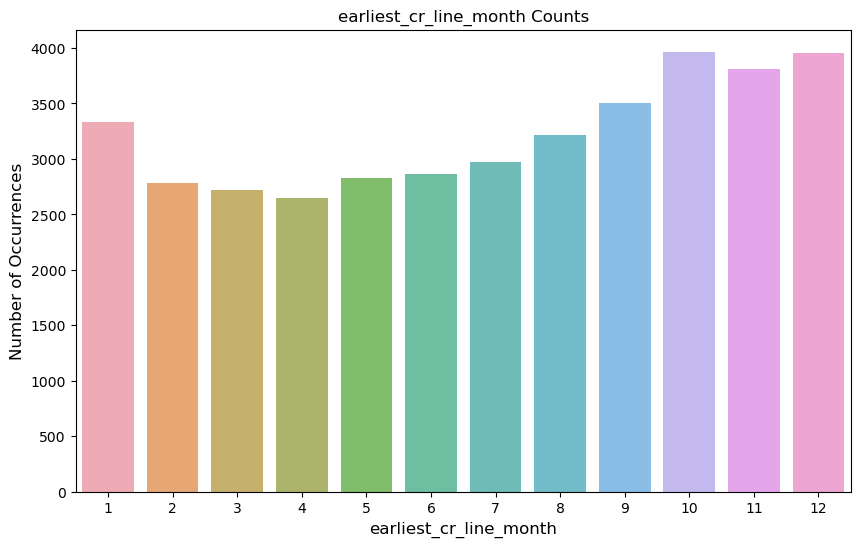

In [37]:
df2['earliest_cr_line_month']=pd.to_datetime(df2['earliest_cr_line'],format='%b-%y').dt.month

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='earliest_cr_line_month', 
            data=df2['earliest_cr_line_month'].value_counts()
            .reset_index(), 
            alpha=0.8)

plt.title('earliest_cr_line_month Counts')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('earliest_cr_line_month', fontsize=12)

plt.show()

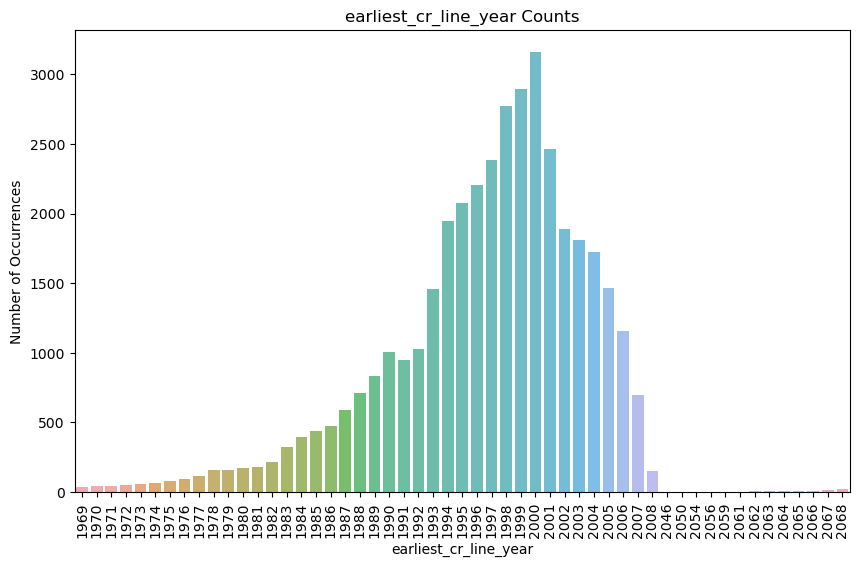

In [38]:
#earliest_cr_line variable should be month year as mentioned in dictionary. Hence converting to datetime and extracting year.
df2['earliest_cr_line_year']=pd.to_datetime(df2['earliest_cr_line'],format='%b-%y').dt.year

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='earliest_cr_line_year', 
            data=df2['earliest_cr_line_year'].value_counts()
            .reset_index(), 
            alpha=0.8)

plt.title('earliest_cr_line_year Counts')
plt.ylabel('Number of Occurrences')
plt.xlabel('earliest_cr_line_year')
plt.xticks(rotation='vertical')

plt.show()

In [39]:
df2.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'mths_since_last_delinq',
       'open_acc', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'earliest_cr_line_month', 'earliest_cr_line_year'],
      dtype='object')

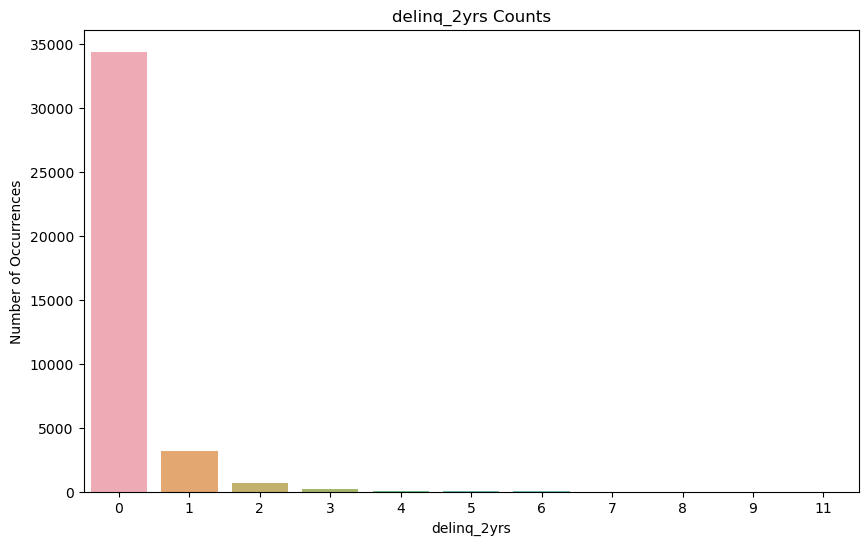

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='delinq_2yrs', 
            data=df2['delinq_2yrs'].value_counts()
            .reset_index(), 
            alpha=0.8)

plt.title('delinq_2yrs Counts')
plt.ylabel('Number of Occurrences')
plt.xlabel('delinq_2yrs')

plt.show()

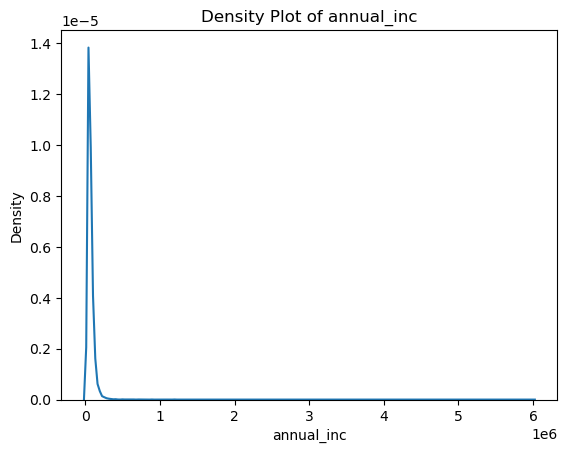

In [41]:
# convert annual_inc to numeric since it is amount
df2['annual_inc']=pd.to_numeric(df2['annual_inc'])

# plt.figure(figsize=(10, 6))
# sns.barplot(x='index', y='annual_inc', 
#             data=df2['annual_inc'].value_counts()
#             .reset_index(), 
#             alpha=0.8)

# plt.title('annual_inc Counts')
# plt.ylabel('Number of Occurrences')
# plt.xlabel('annual_inc')

# plt.show()

sns.kdeplot(df2['annual_inc'])
plt.title('Density Plot of annual_inc')
plt.show()

In [42]:
q3=df2['annual_inc'].quantile(0.75)
q1=df2['annual_inc'].quantile(0.25)

iqr=q3-q1

out=q3+(1.5*iqr)
out

145000.0

In [43]:
df2=df2[(df2['annual_inc']<out)]
df2.shape

(36754, 41)

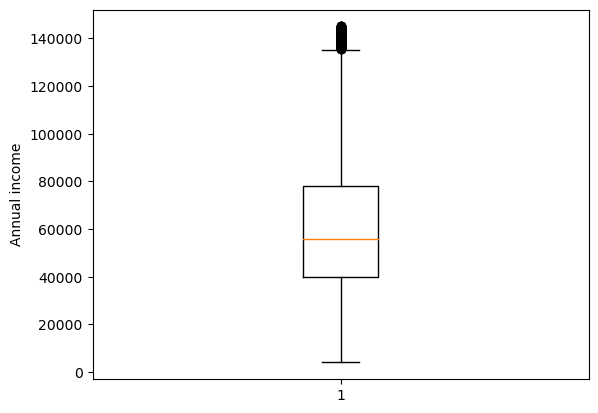

In [44]:
# The most frequent loan amount is between 4000 and 7000.
# outlier detection on annual income variable
plt.boxplot(df2['annual_inc'], vert=True)
plt.ylabel('Annual income')
plt.show()

In [45]:
df2['collection_recovery_fee'].value_counts()

0.0000      33116
2.0000         12
3.7100          9
1.2000          9
1.6900          8
            ...  
205.2108        1
11.2615         1
3.7900          1
773.4900        1
0.2300          1
Name: collection_recovery_fee, Length: 2515, dtype: int64

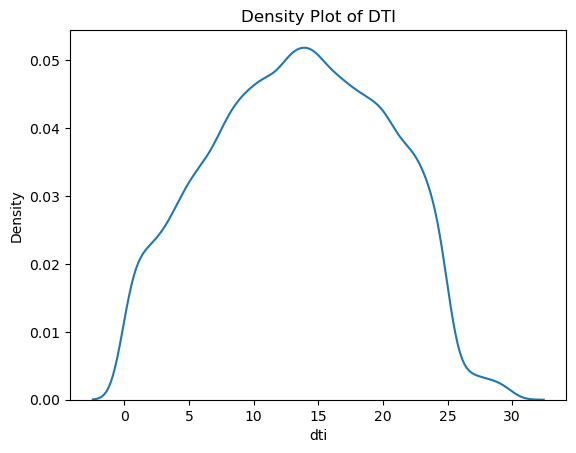

In [46]:
sns.kdeplot(df2['dti'])
plt.title('Density Plot of DTI')
plt.show()



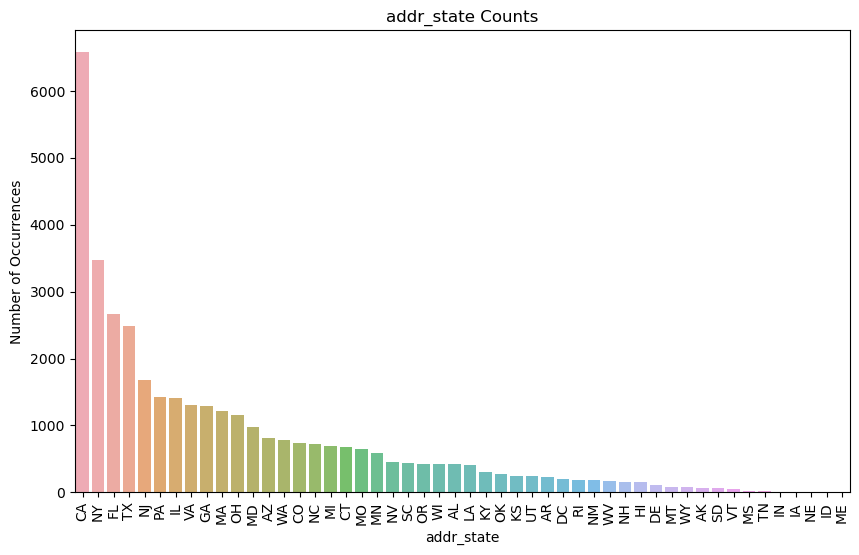

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='addr_state', 
            data=df2['addr_state'].value_counts().reset_index(), 
            alpha=0.8)

plt.title('addr_state Counts')
plt.ylabel('Number of Occurrences')
plt.xlabel('addr_state')
plt.xticks(rotation='vertical')

plt.show()

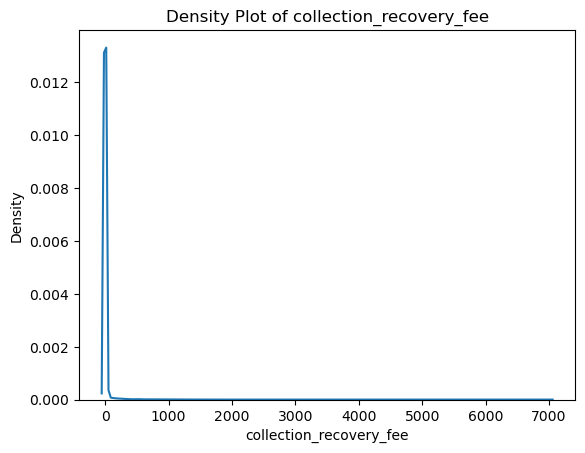

In [48]:
sns.kdeplot(df2['collection_recovery_fee'])
plt.title('Density Plot of collection_recovery_fee')
plt.show()

## Univariate Analysis

In [49]:
df2['loan_amnt'].describe()

count    36754.000000
mean     10696.825516
std       7060.951959
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

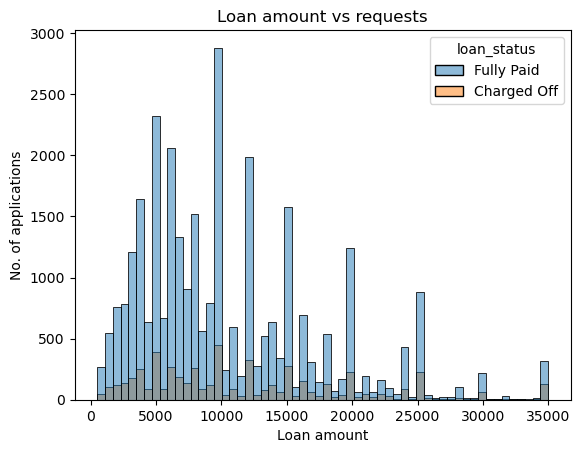

In [50]:
sns.histplot(x='loan_amnt',hue='loan_status', data=df2)
plt.xlabel('Loan amount')
plt.ylabel('No. of applications')
plt.title('Loan amount vs requests')
plt.show()

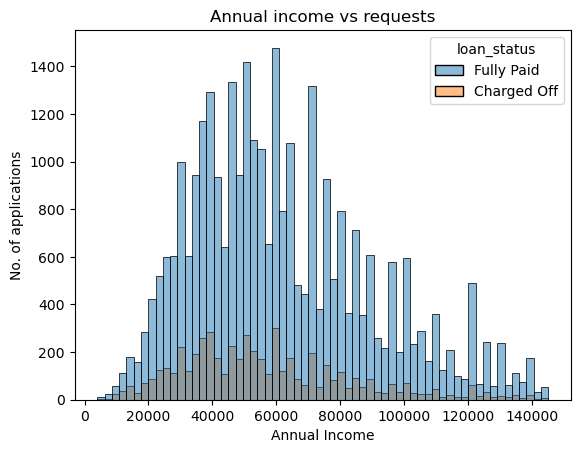

In [51]:
# The most frequent loan amount is between 9000 and 10000.
sns.histplot(x='annual_inc',hue='loan_status', data=df2)
plt.xlabel('Annual Income')
plt.ylabel('No. of applications')
plt.title('Annual income vs requests')
plt.show()

In [52]:
df2.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off    56617.734778
Fully Paid     61852.357900
Name: annual_inc, dtype: float64

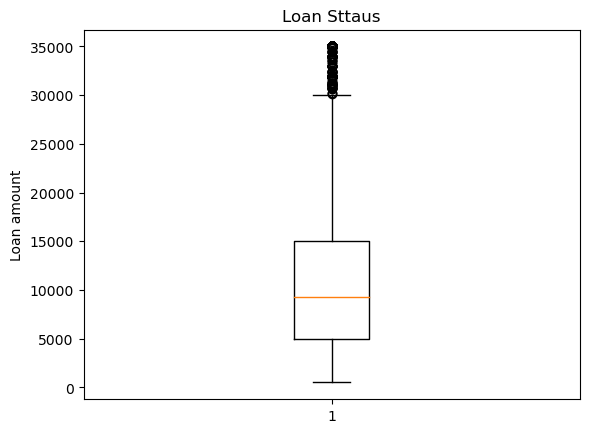

In [53]:
# For fully paid loans, annual income mean is 61852.35 and for charged off loans its 56617.73. 
plt.boxplot(df2['loan_amnt'])
plt.ylabel('Loan amount')
plt.title('Loan Sttaus')
plt.show()

### Median of the loan amount is 10000.

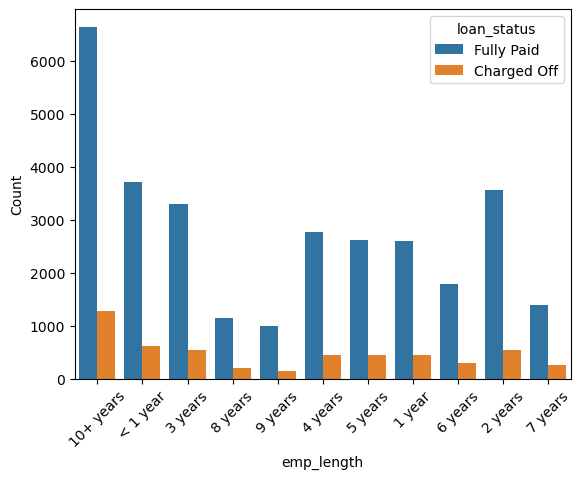

In [54]:
# employment length categorisation
chrt=sns.countplot(x='emp_length',hue='loan_status', data=df2)
chrt.set_xticklabels(chrt.get_xticklabels(),rotation=45)
plt.ylabel('Count')
plt.show()

### Most of the applicants have employment tenure more than 11 years.This might be persons with emp length >11 years taking loans for various requirements.

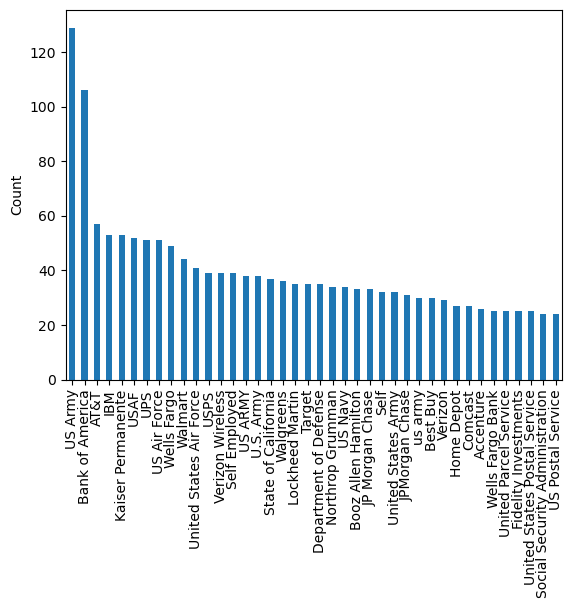

In [55]:
# employment title categorisation
df2['emp_title'].value_counts().sort_values(ascending=False)[:40].plot(kind='bar')
plt.ylabel('Count')
plt.show()

### Most of the applicants are from US army, Bank of America and IBM

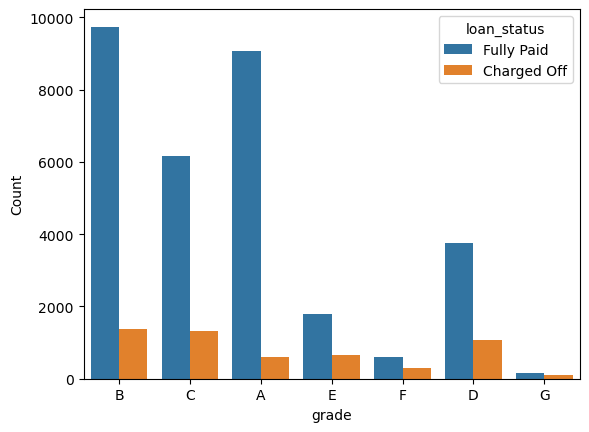

In [56]:
# grade categorisation
sns.countplot(x='grade',hue='loan_status', data=df2)
plt.ylabel('Count')
plt.show()

### Most of the loan grades are B and A for fully paid loans, whereas it is B and C for charged off loans.

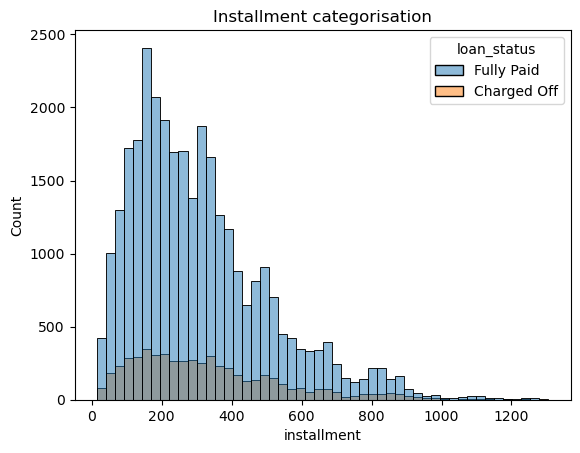

In [57]:
# Installment categorisation
sns.histplot(x='installment',hue='loan_status', data=df2,bins=50)
plt.ylabel('Count')
plt.title('Installment categorisation')
plt.show()

### Most of the installments are between 150 and 200.

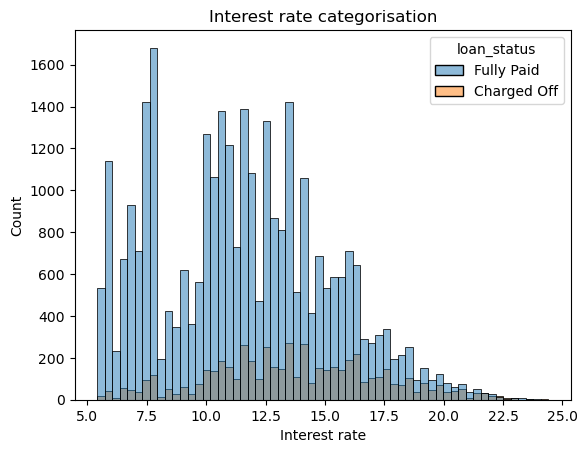

In [58]:
# Interest rate categorisation
sns.histplot(x='int_rate',hue='loan_status', data=df2)
plt.ylabel('Count')
plt.xlabel('Interest rate')
plt.title('Interest rate categorisation')
plt.show()

### Most of the interest rates are 7.5-8% for fully paid loans and more than 11% for charged off loans.

loan_status
Charged Off    13.763467
Fully Paid     11.563777
Name: int_rate, dtype: float64


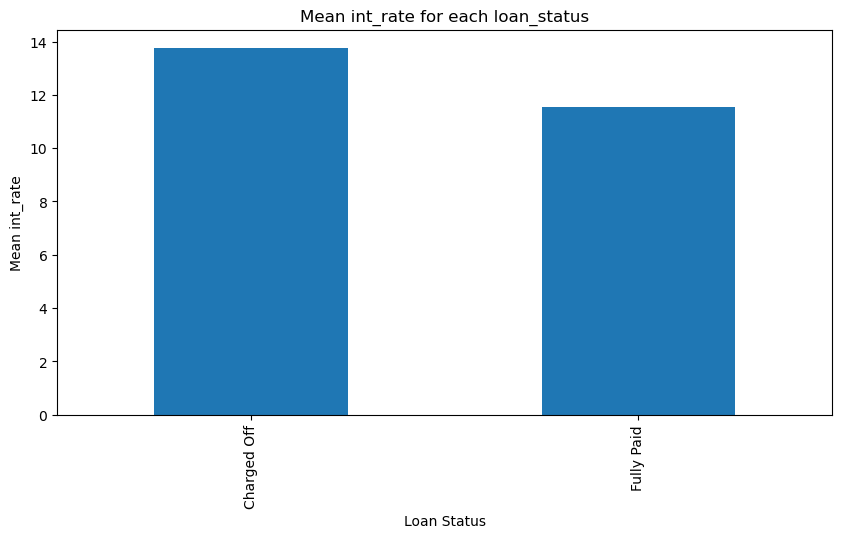

In [59]:
print(df2.groupby('loan_status')['int_rate'].mean())
plt.figure(figsize=(10,5))
df2.groupby('loan_status')['int_rate'].mean().plot(kind='bar')
plt.title('Mean int_rate for each loan_status')
plt.xlabel('Loan Status')
plt.ylabel('Mean int_rate')
plt.show()


### Average interest rate for charged off loans is 13.7% and for fully paid loans is 11.5%.

In [60]:
df2['int_rate'].mean()

11.888696740490833

In [61]:
df2['int_rate'].median()

11.71

### Average interest rate is 11.88% and median is 11.71%.

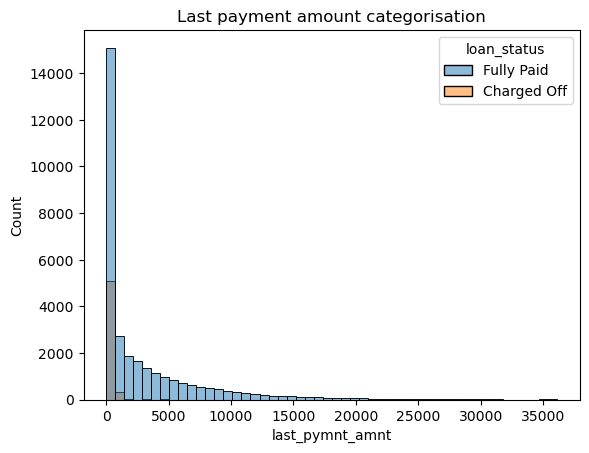

In [62]:
# Last month payment categorisation
sns.histplot(x='last_pymnt_amnt',hue='loan_status', data=df2,bins=50)
plt.ylabel('Count')
plt.title('Last payment amount categorisation')
plt.show()

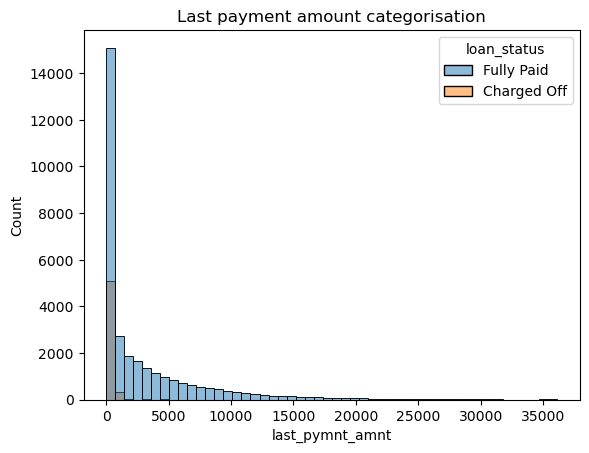

In [63]:
# Last month payment categorisation
sns.histplot(x='last_pymnt_amnt',hue='loan_status', data=df2,bins=50)
plt.ylabel('Count')
plt.title('Last payment amount categorisation')
plt.show()

### Last payment is significantly more for fully paid loand than charged off loans.

In [64]:
df2['last_pymnt_amnt'].median()

545.14

In [65]:
df2['last_pymnt_amnt'].mean()

2631.5792319203347

### Median payment received last month is 540.08 and mean is 2603.37

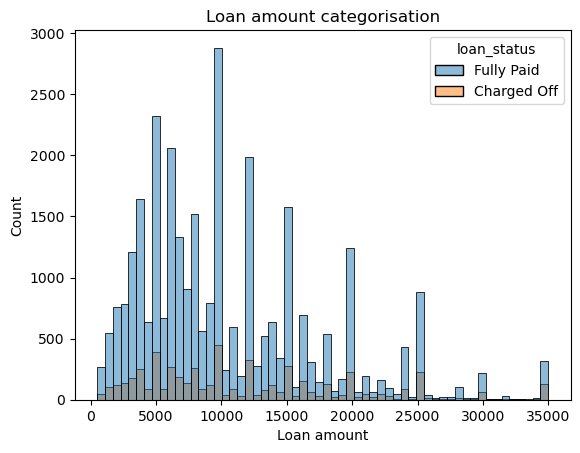

In [66]:
# Loan amount categorisation
sns.histplot(x='loan_amnt',hue='loan_status', data=df2)
plt.ylabel('Count')
plt.xlabel('Loan amount')
plt.title('Loan amount categorisation')
plt.show()

### From above, it is observed that higher loan amounts are fully paid.

In [67]:
df2['loan_amnt'].median()

9250.0

In [68]:
df2['loan_amnt'].mean()

10696.82551559014

### The mean of applied loan amounts is 10620.21 & median is 9000.0

<Axes: xlabel='loan_status', ylabel='count'>

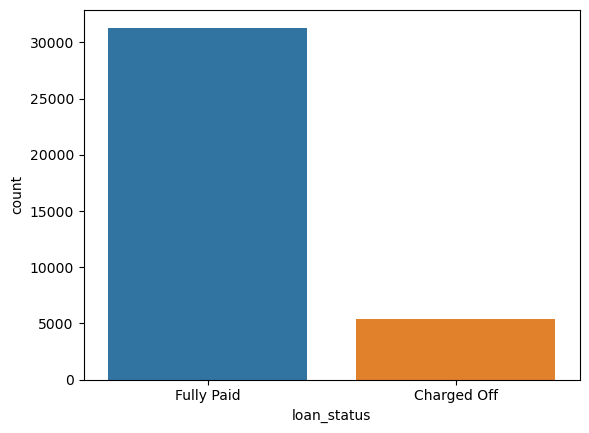

In [69]:
# Loan status count 
sns.countplot(x ='loan_status', data = df2)

In [70]:
print("Percentage of charged off status: " + str(df2['loan_status'].value_counts()['Charged Off']*100/df2['loan_status'].count()))

Percentage of charged off status: 14.771181368014366


In [71]:
print("Percentage of Fully Paid status: " + str(df2['loan_status'].value_counts()['Fully Paid']*100/df2['loan_status'].count()))

Percentage of Fully Paid status: 85.22881863198563


### More than 85% loan are fully paid and more than 14% are charged off

[Text(0.0, 0, '0'),
 Text(2000.0, 0, '2000'),
 Text(4000.0, 0, '4000'),
 Text(6000.0, 0, '6000'),
 Text(8000.0, 0, '8000'),
 Text(10000.0, 0, '10000'),
 Text(12000.0, 0, '12000'),
 Text(14000.0, 0, '14000'),
 Text(16000.0, 0, '16000')]

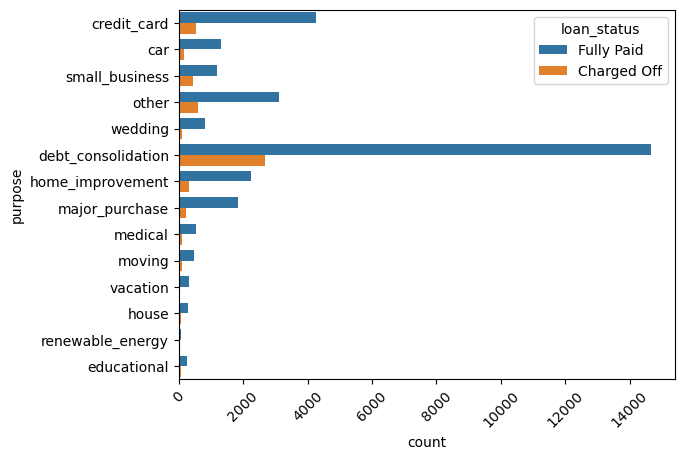

In [72]:
# Loan status count 
my_plot=sns.countplot(y ='purpose',hue='loan_status',  data = df2)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)


### Most of the persons applying loan are for debt consolidation.

In [73]:
df2['total_pymnt'].describe()

count    36754.000000
mean     11458.227350
std       8424.066506
min          0.000000
25%       5421.791753
50%       9378.138301
75%      15481.607958
max      58563.679930
Name: total_pymnt, dtype: float64

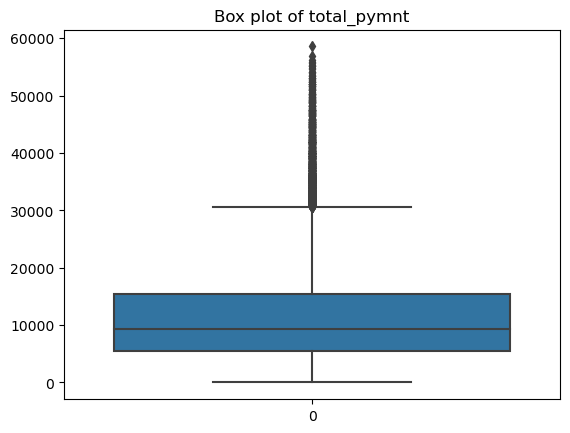

In [74]:
sns.boxplot(df2['total_pymnt'])
plt.title('Box plot of total_pymnt')
plt.show()

In [75]:
df2['total_rec_int'].describe()

count    36754.000000
mean      2037.722536
std       2279.749532
min          0.000000
25%        630.760000
50%       1263.260000
75%       2561.970000
max      23563.680000
Name: total_rec_int, dtype: float64

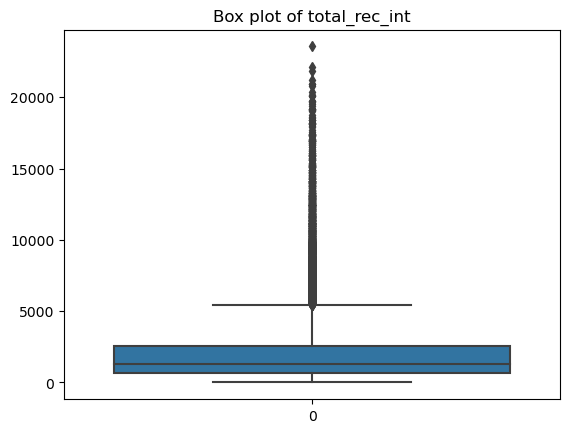

In [76]:
sns.boxplot(df2['total_rec_int'])
plt.title('Box plot of total_rec_int')
plt.show()

In [77]:
df2['total_rec_late_fee'].describe()

count    36754.000000
mean         1.338435
std          7.175596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

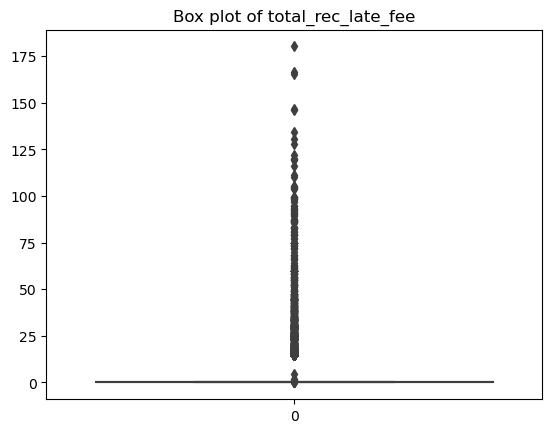

In [78]:
sns.boxplot(df2['total_rec_late_fee'])
plt.title('Box plot of total_rec_late_fee')
plt.show()

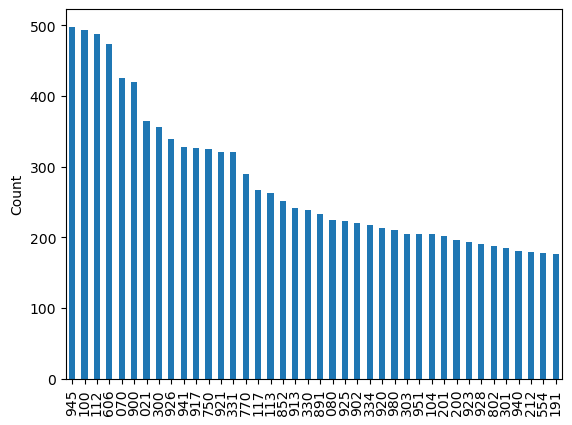

In [79]:
# Zipcode of persons applying count 
df2['zip_code'].value_counts().sort_values(ascending=False)[:40].plot(kind='bar')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='home_ownership', ylabel='count'>

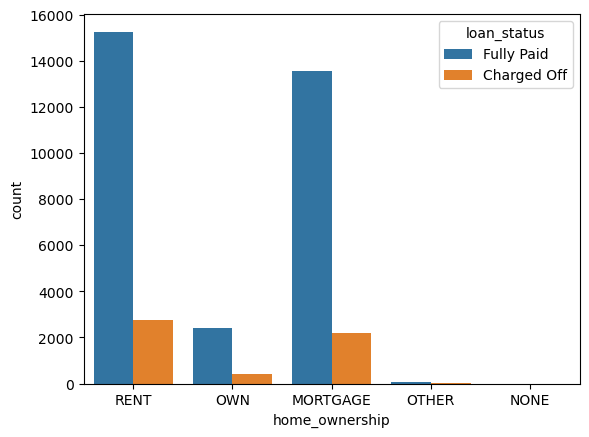

In [80]:
# Home ownership count 
sns.countplot(x ='home_ownership',hue='loan_status',data = df2)

### Mostly home ownership is on rent for fully paid and charged off. Very less applicants with own home ownership have charged off loans.

<Axes: xlabel='term', ylabel='count'>

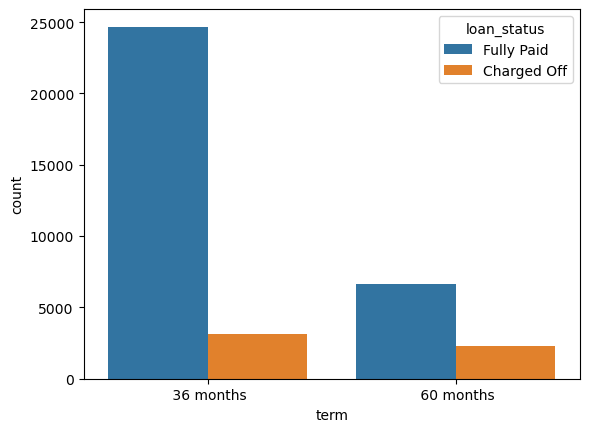

In [81]:
# Term count 
sns.countplot(x ='term',hue='loan_status', data = df2)

<Axes: xlabel='verification_status', ylabel='count'>

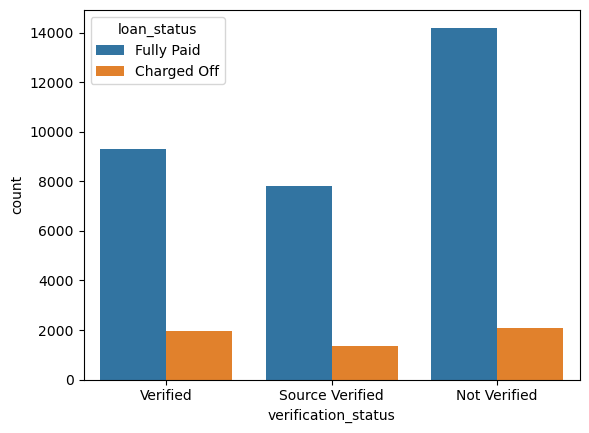

In [82]:
# Verification status count 
sns.countplot(x ='verification_status',hue='loan_status',  data = df2)

### Most of the fully paid loans are not verified.

<Axes: xlabel='issue_d_month', ylabel='count'>

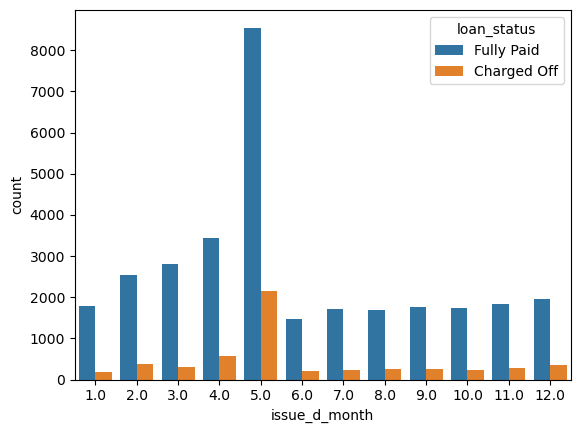

In [83]:
# Loan issued month count 
#issue_d variable should be month year as mentioned in dictionary. Hence converting to datetime and extracting month.
df2['issue_d_month']=pd.to_datetime(df2['last_credit_pull_d'],format='%b-%y').dt.month
sns.countplot(x ='issue_d_month',hue='loan_status', data = df2)
# df2.columns

### Most of the loans are issued in the month of May.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2007.0'),
  Text(1, 0, '2008.0'),
  Text(2, 0, '2009.0'),
  Text(3, 0, '2010.0'),
  Text(4, 0, '2011.0'),
  Text(5, 0, '2012.0'),
  Text(6, 0, '2013.0'),
  Text(7, 0, '2014.0'),
  Text(8, 0, '2015.0'),
  Text(9, 0, '2016.0')])

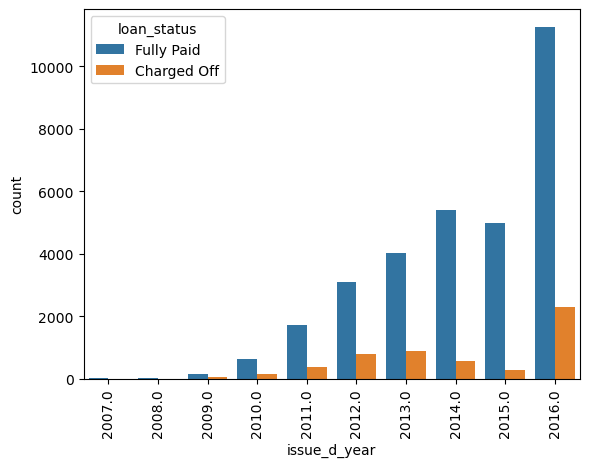

In [84]:
# Loan issued year count 
#issue_d variable should be month year as mentioned in dictionary. Hence converting to datetime and extracting month.
df2['issue_d_year']=pd.to_datetime(df2['last_credit_pull_d'],format='%b-%y').dt.year

sns.countplot(x ='issue_d_year',hue='loan_status',data = df2)
plt.xticks(rotation='vertical')

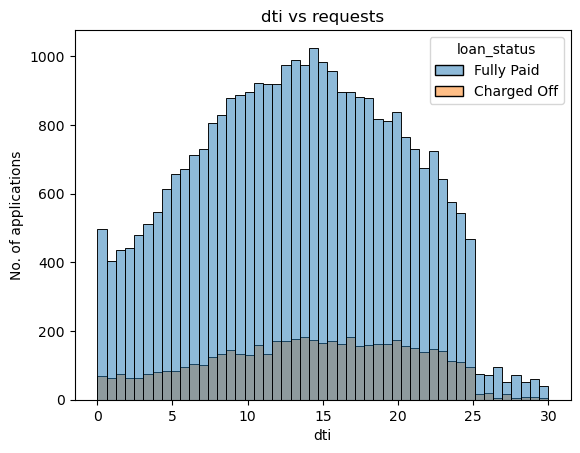

In [85]:
sns.histplot(x='dti',hue='loan_status', data=df2)
plt.xlabel('dti')
plt.ylabel('No. of applications')
plt.title('dti vs requests')
plt.show()

### for applicants with dti 17 have more chance of charged off loans.

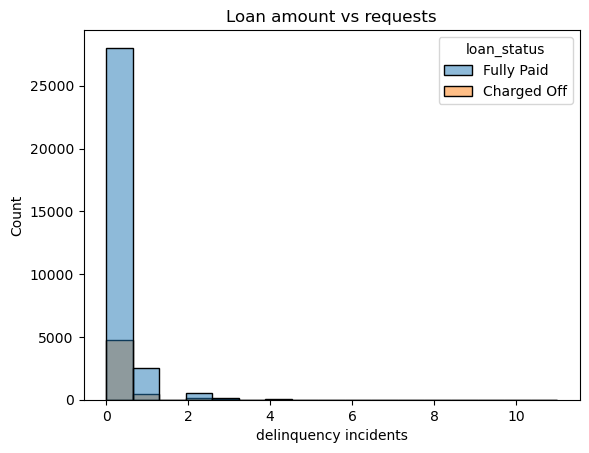

In [86]:
sns.histplot(x='delinq_2yrs',hue='loan_status', data=df2)
plt.xlabel('delinquency incidents')
plt.ylabel('Count')
plt.title('Loan amount vs requests')
plt.show()

# Bivariate Analysis

In [87]:
df3=df2[df2['loan_status']=='Charged Off']
df3.shape

(5429, 43)

In [88]:
df3['ann_inc_bins'] = pd.cut(x=df3['annual_inc'], bins=[0, 20000, 40000, 60000, 80000, 100000,120000,140000],labels=['1 to 20', '21 to 40', '41 to 60',
                            '61 to 80', '81 to 100','101 to 120','121 to 140'])

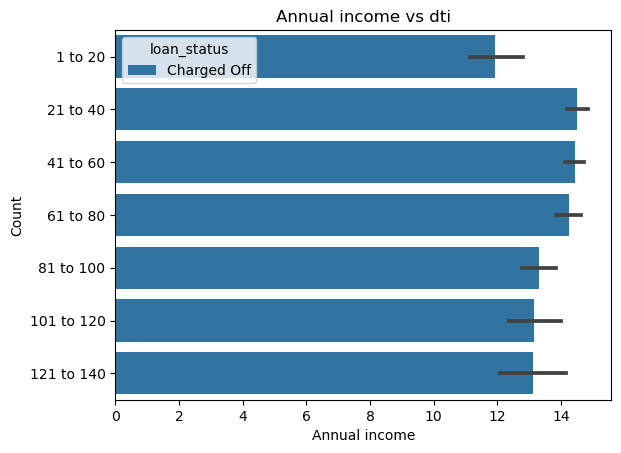

In [89]:
sns.barplot(x='dti',y='ann_inc_bins',hue='loan_status', data=df3)
plt.xlabel('Annual income')
plt.ylabel('Count')
plt.title('Annual income vs dti')
plt.show()

In [90]:
df3['ann_inc_bins'].value_counts()

41 to 60      1729
21 to 40      1514
61 to 80      1024
81 to 100      531
101 to 120     244
1 to 20        237
121 to 140     137
Name: ann_inc_bins, dtype: int64

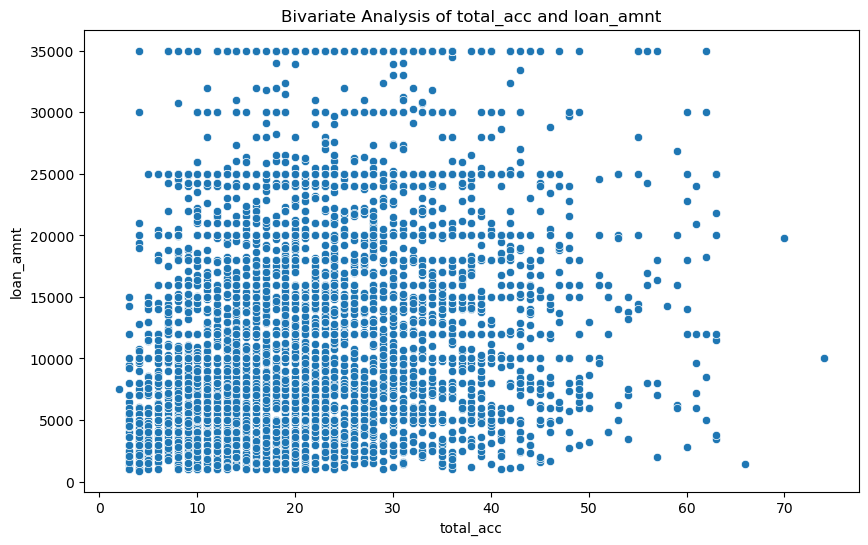

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_acc', y='loan_amnt', data=df3)
plt.title('Bivariate Analysis of total_acc and loan_amnt')
plt.show()

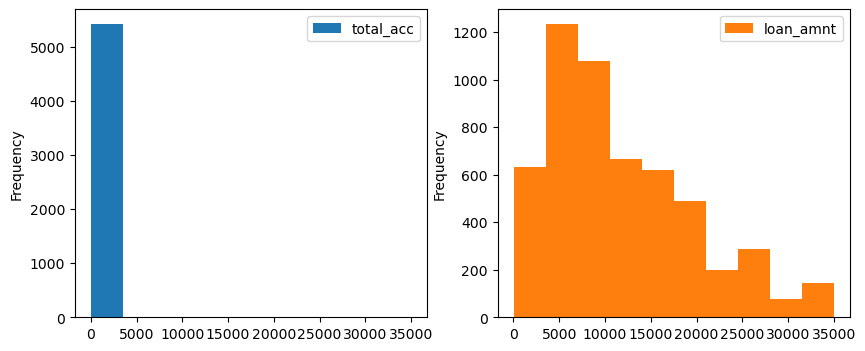

In [92]:
df3[['total_acc', 'loan_amnt']].plot(kind='hist', subplots=True, layout=(1,2), sharex=False, figsize=(10, 4))
plt.show()


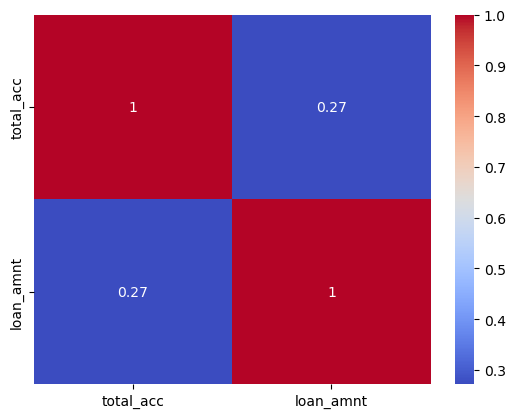

In [93]:
corr = df3[['total_acc', 'loan_amnt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


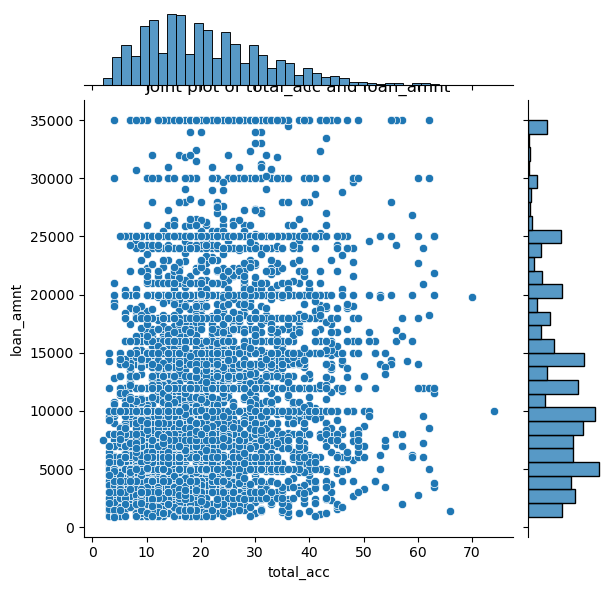

In [94]:
sns.jointplot(x='total_acc', y='loan_amnt', data=df3)
plt.title('Joint plot of total_acc and loan_amnt')
plt.show()


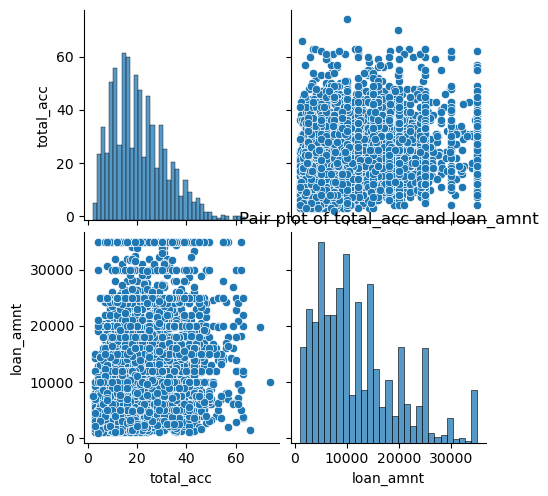

In [95]:
sns.pairplot(df3[['total_acc', 'loan_amnt']])
plt.title('Pair plot of total_acc and loan_amnt')
plt.show()


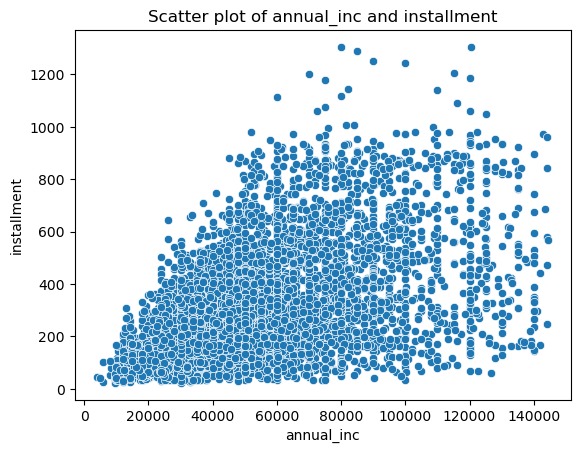

In [96]:
sns.scatterplot(x='annual_inc', y='installment', data=df3)
plt.title('Scatter plot of annual_inc and installment')
plt.show()


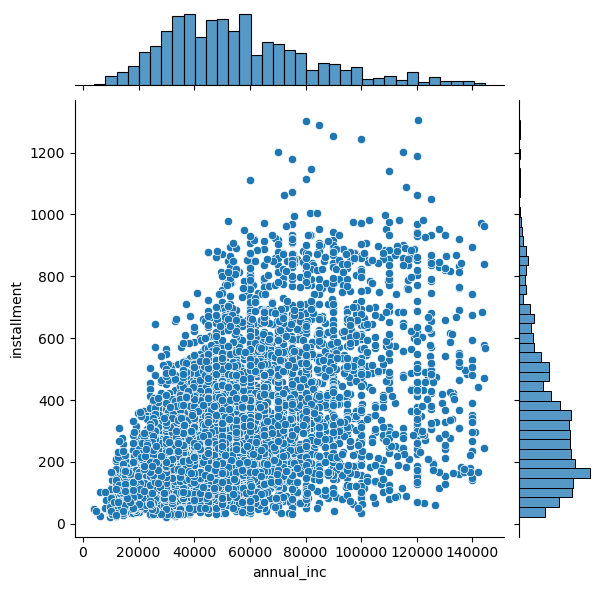

In [97]:
# Joint plot
sns.jointplot(x='annual_inc', y='installment', data=df3)

plt.show()


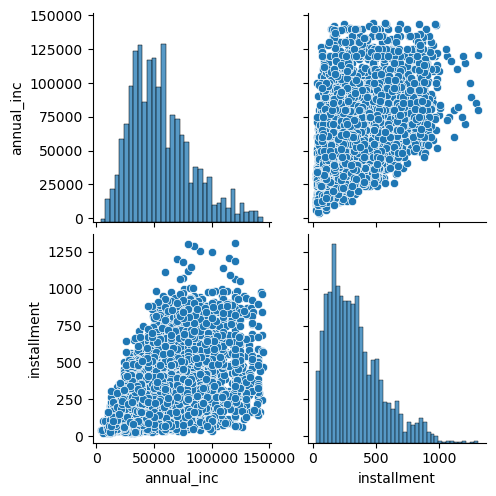

In [98]:
# plt.title('Pair plot of annual_inc and installment')
sns.pairplot(df3[['annual_inc', 'installment']])

plt.show()


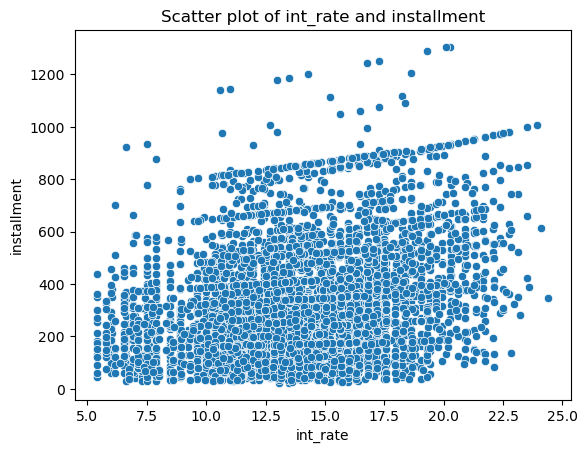

In [99]:
sns.scatterplot(x='int_rate', y='installment', data=df3)
plt.title('Scatter plot of int_rate and installment')
plt.show()


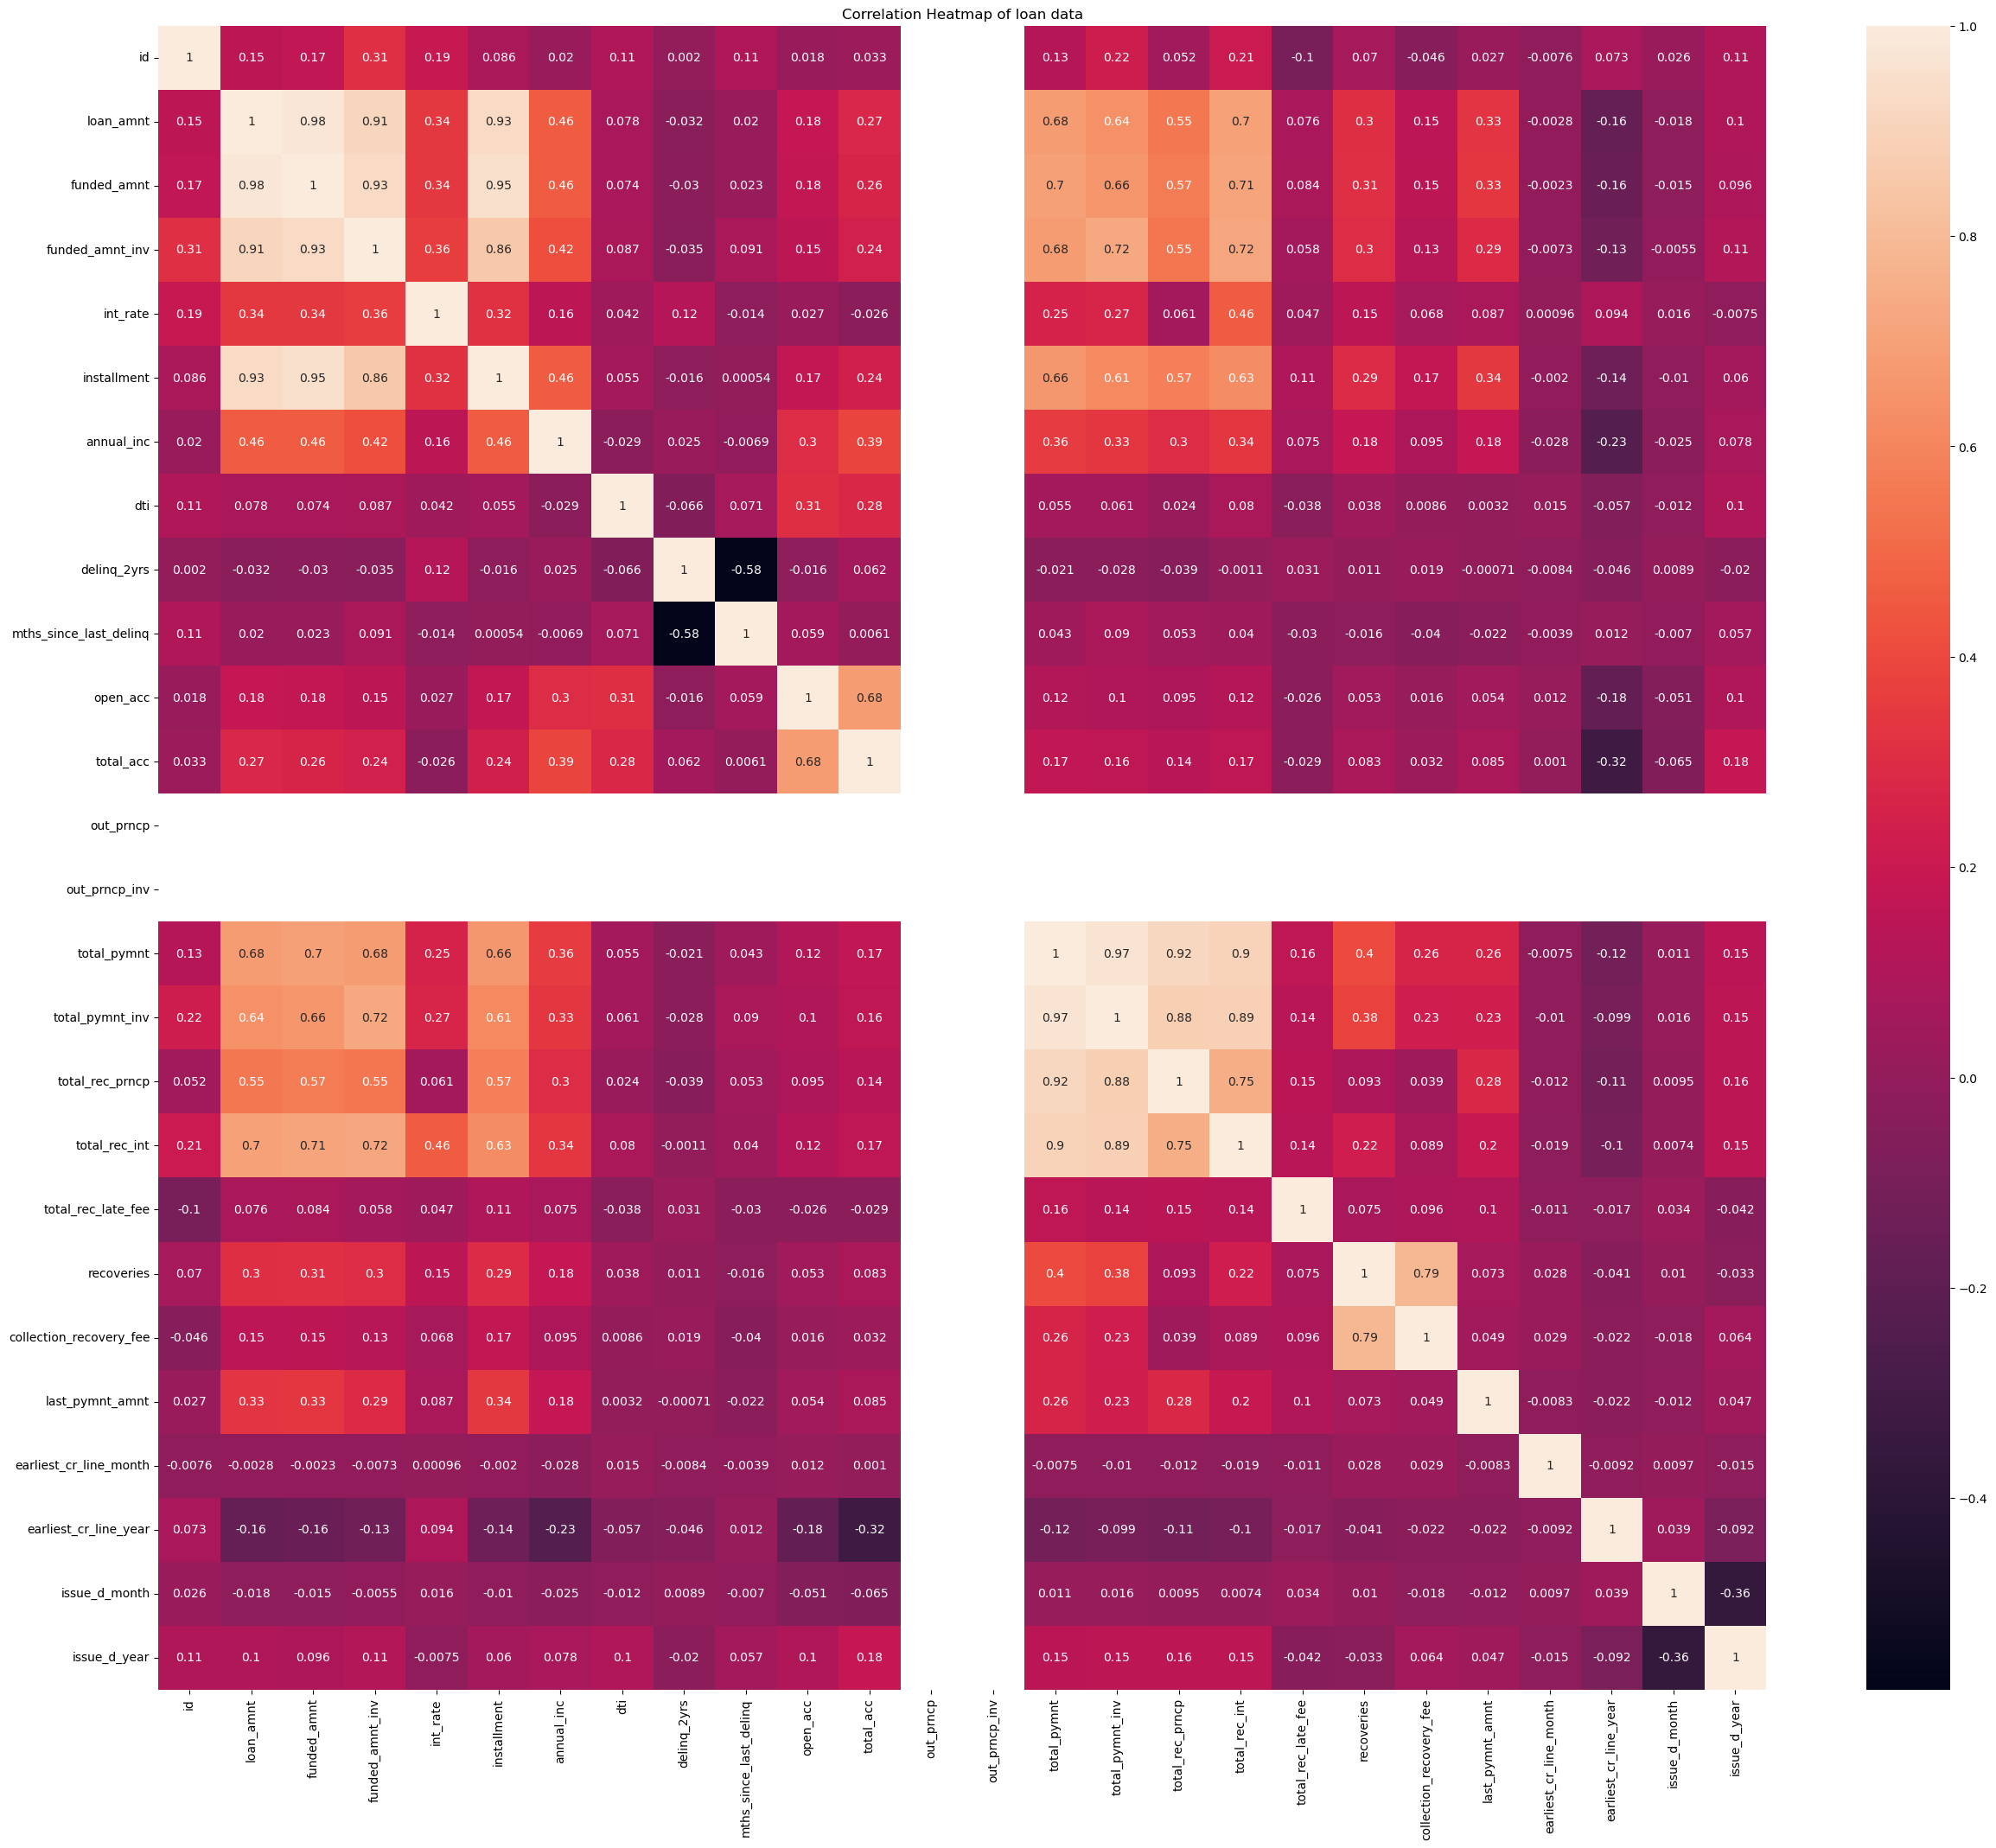

In [100]:
plt.figure(figsize=(30, 25))
sns.heatmap(df3.corr(),annot=True)
plt.title('Correlation Heatmap of loan data')

plt.show()

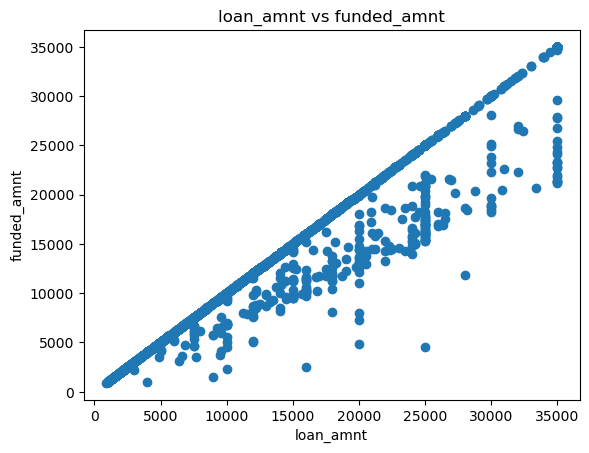

In [101]:
plt.scatter(df3['loan_amnt'], df3['funded_amnt'])
plt.title('loan_amnt vs funded_amnt')
plt.xlabel('loan_amnt')
plt.ylabel('funded_amnt')
plt.show()


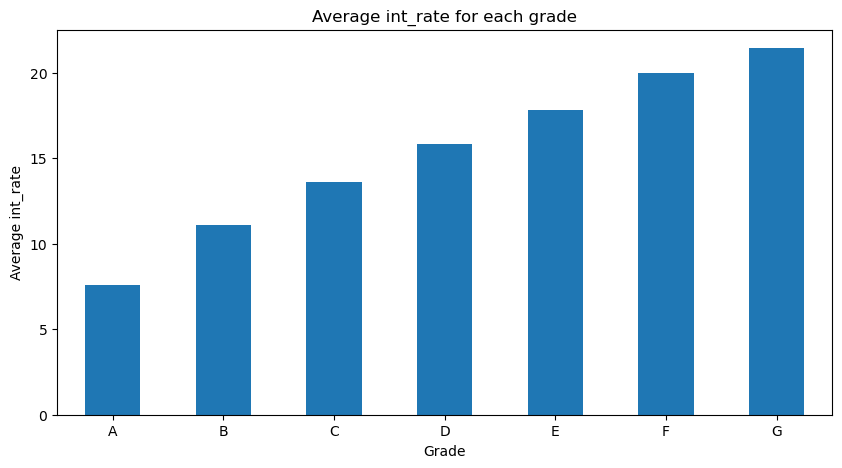

In [102]:
mean_int_rate = df3.groupby('grade')['int_rate'].mean()

plt.figure(figsize=(10,5))
mean_int_rate.plot(kind='bar')
plt.title('Average int_rate for each grade')
plt.xlabel('Grade')
plt.ylabel('Average int_rate')
plt.xticks(rotation='horizontal')

plt.show()


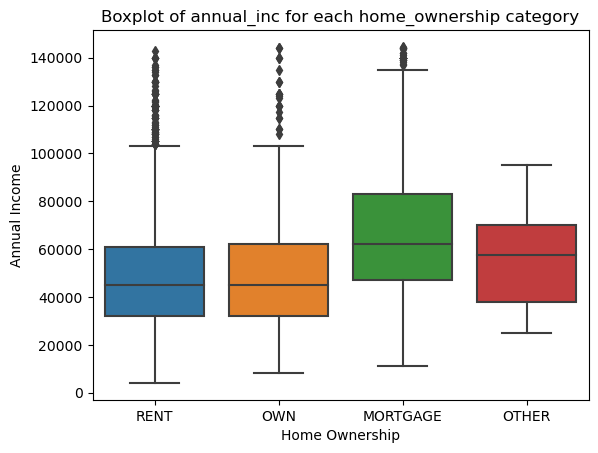

In [103]:
sns.boxplot(x=df3['home_ownership'], y=df3['annual_inc'])
plt.title('Boxplot of annual_inc for each home_ownership category')
plt.xlabel('Home Ownership')
plt.ylabel('Annual Income')
plt.show()


In [104]:
cross_tabulation = pd.crosstab(df3['term'], df3['loan_status'])
print(cross_tabulation)

loan_status  Charged Off
term                    
 36 months          3118
 60 months          2311


In [105]:
selected_columns = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc']
correlation_matrix = df3[selected_columns].corr()

print(correlation_matrix)


             loan_amnt  funded_amnt  installment  annual_inc
loan_amnt     1.000000     0.980354     0.926920    0.461592
funded_amnt   0.980354     1.000000     0.953573    0.456770
installment   0.926920     0.953573     1.000000    0.457881
annual_inc    0.461592     0.456770     0.457881    1.000000


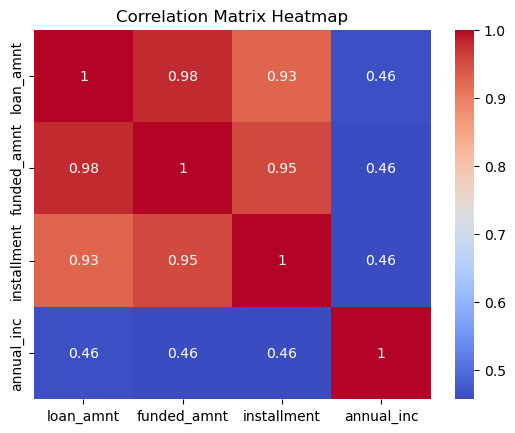

In [106]:
selected_columns = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc']
correlation_matrix = df3[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


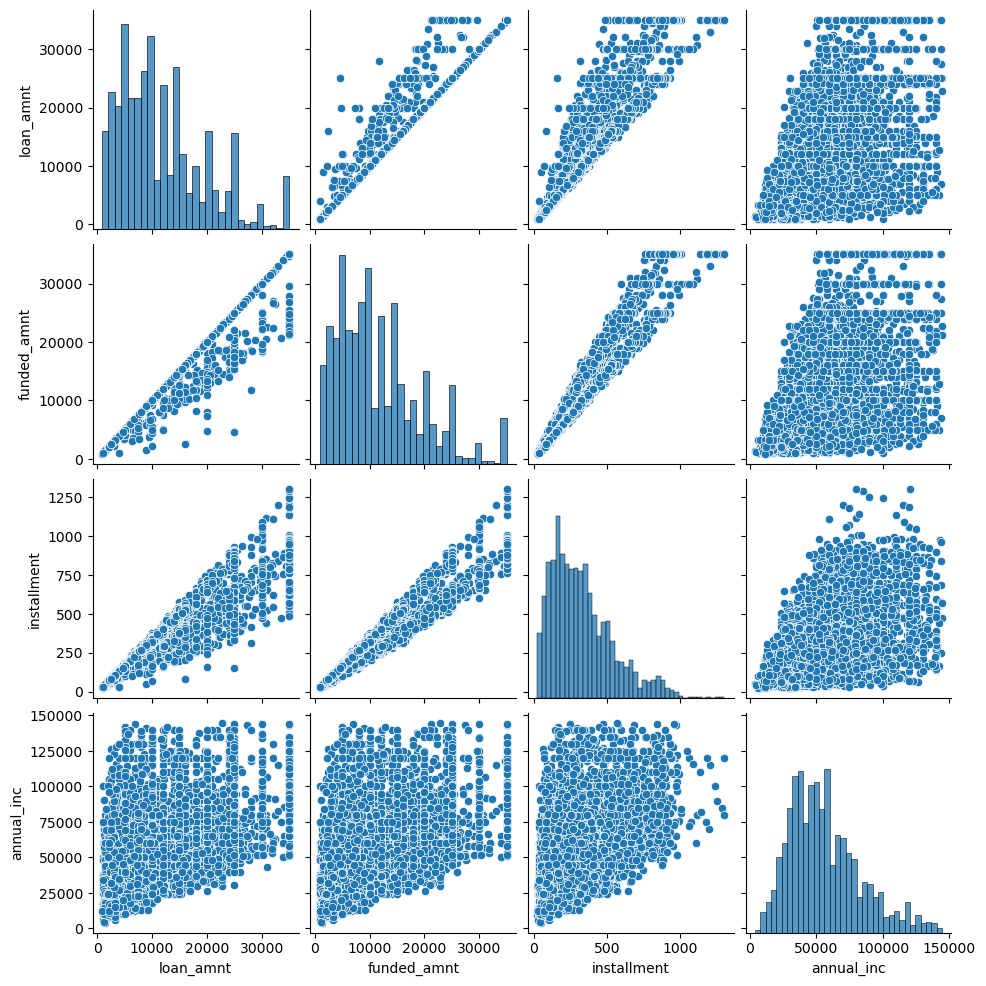

In [107]:
selected_columns = ['loan_amnt', 'funded_amnt', 'installment', 'annual_inc']
sns.pairplot(df3[selected_columns])
plt.show()


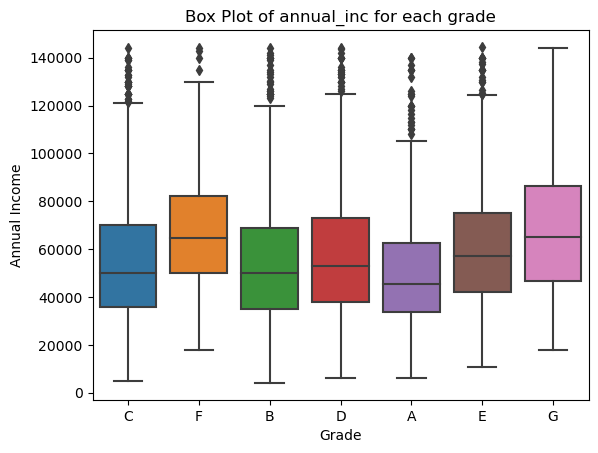

In [108]:
sns.boxplot(x=df3['grade'], y=df3['annual_inc'])
plt.title('Box Plot of annual_inc for each grade')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.show()


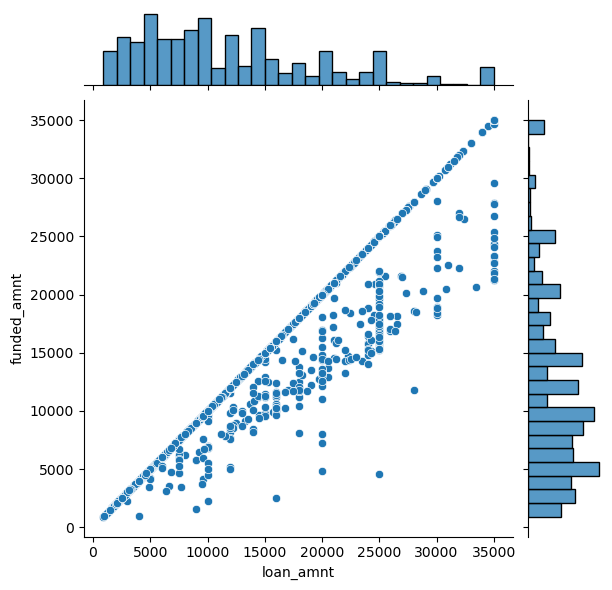

In [109]:
sns.jointplot(x=df3['loan_amnt'], y=df3['funded_amnt'])
plt.show()


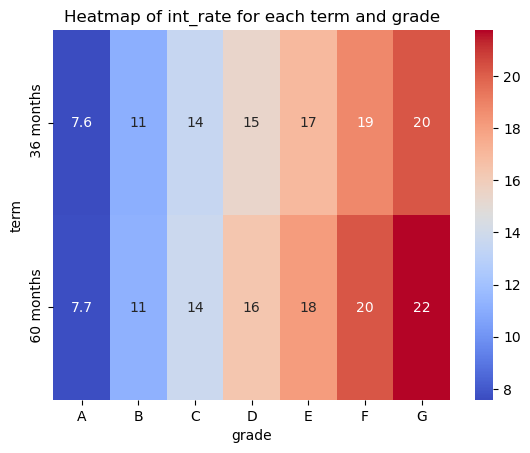

In [110]:
pivot_table = df3.pivot_table(values='int_rate', index='term', columns='grade')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of int_rate for each term and grade')
plt.show()


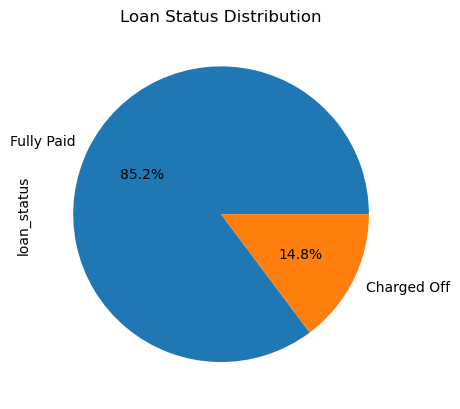

In [111]:
# Pie chart
df2['loan_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()


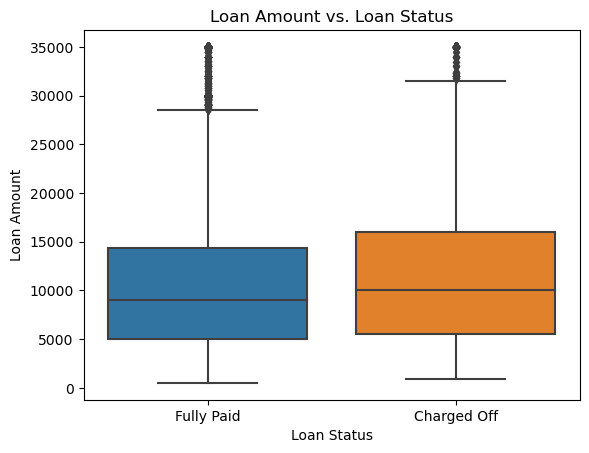

In [112]:
sns.boxplot(x=df2['loan_status'], y=df2['loan_amnt'])
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


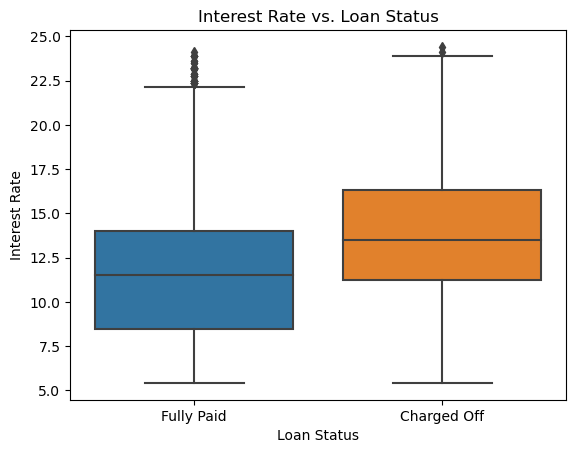

In [113]:
sns.boxplot(x=df2['loan_status'], y=df2['int_rate'])
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()


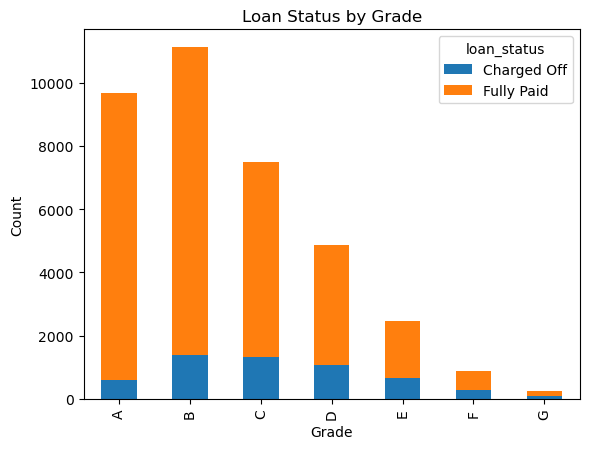

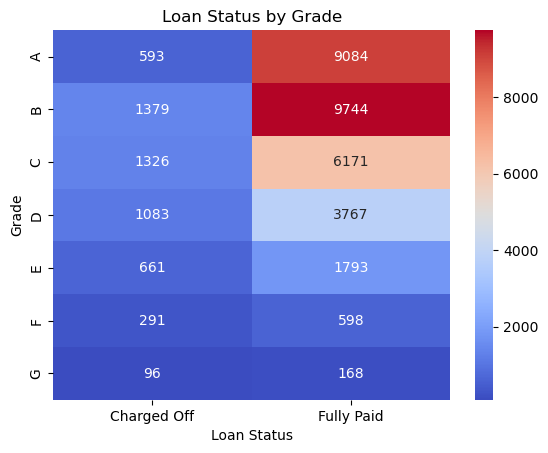

In [114]:
cross_tab = pd.crosstab(df2['grade'], df2['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Heatmap
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Loan Status by Grade')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.show()


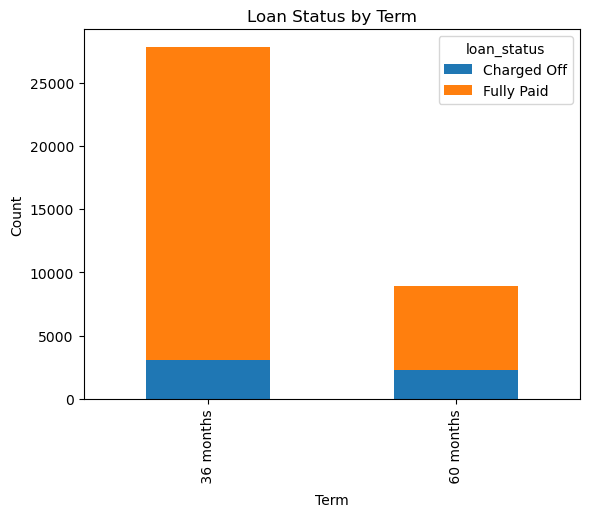

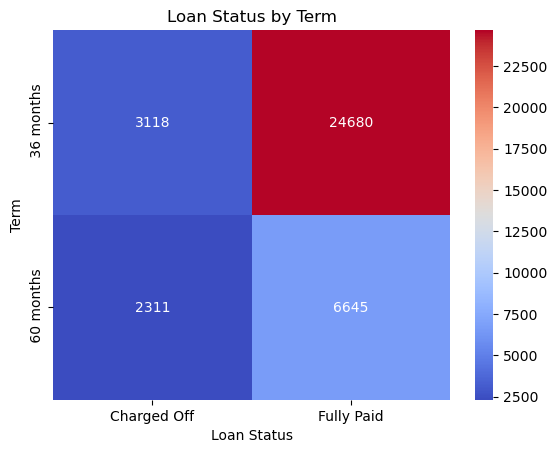

In [115]:
cross_tab = pd.crosstab(df2['term'], df2['loan_status'])
cross_tab.plot(kind='bar', stacked=True)
plt.title('Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
plt.show()

# Heatmap
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Loan Status by Term')
plt.xlabel('Loan Status')
plt.ylabel('Term')
plt.show()


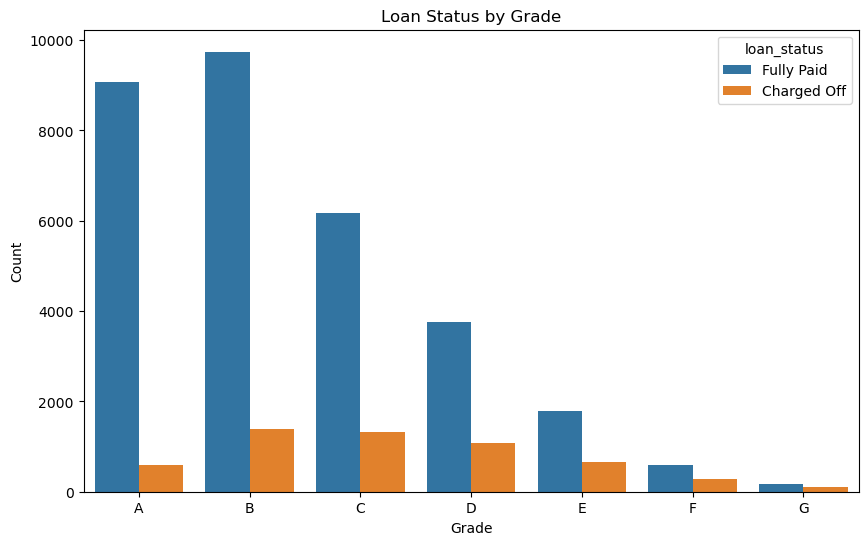

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(x='grade', hue='loan_status', data=df2, order=sorted(df2['grade'].unique()))
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

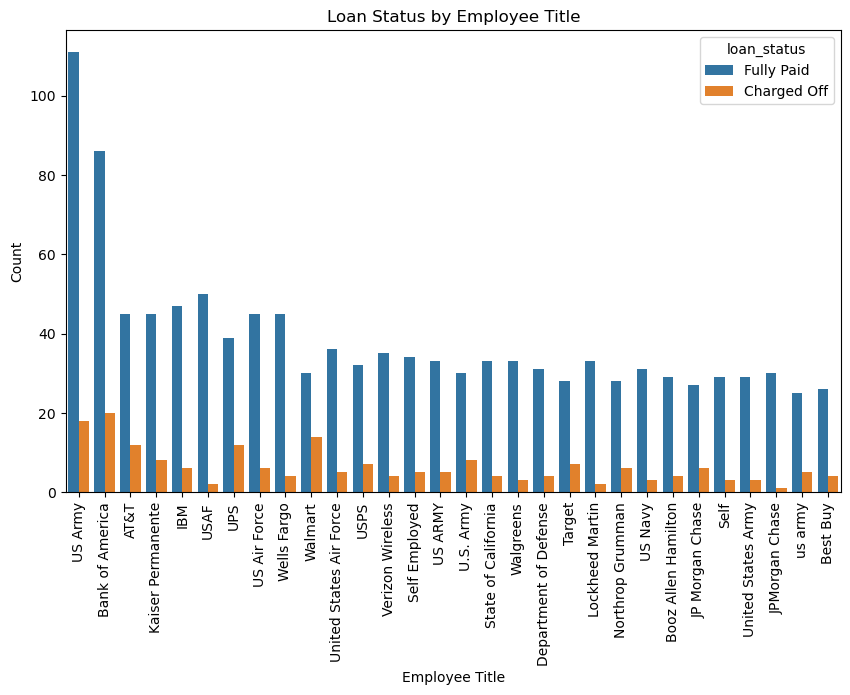

In [117]:
N = 30
top_emp_titles = df2['emp_title'].value_counts().nlargest(N).index

plt.figure(figsize=(10,6))
sns.countplot(x='emp_title', hue='loan_status', data=df2[df2['emp_title'].isin(top_emp_titles)], order=top_emp_titles)
plt.title('Loan Status by Employee Title')
plt.xlabel('Employee Title')
plt.ylabel('Count')
plt.xticks(rotation='vertical')
plt.show()


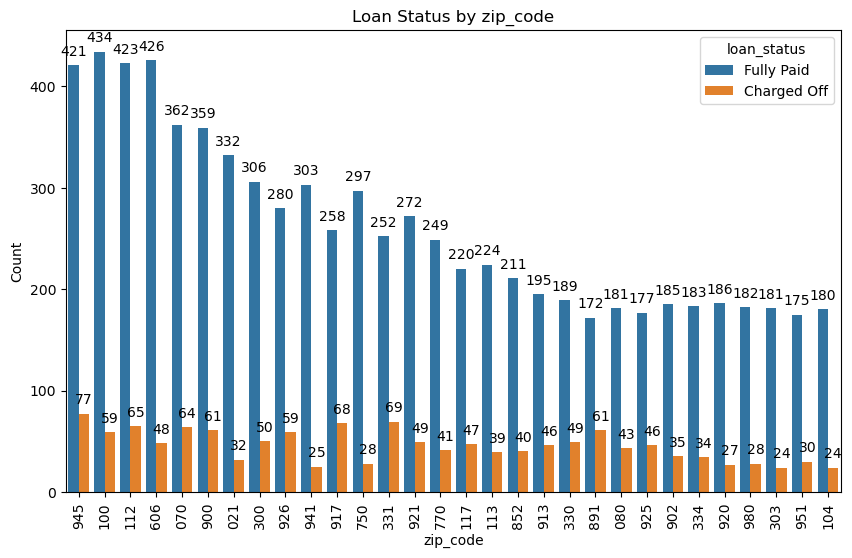

In [118]:
N = 30
top_zip_code = df2['zip_code'].value_counts().nlargest(N).index

plt.figure(figsize=(10,6))
plot = sns.countplot(x='zip_code', hue='loan_status', data=df2[df2['zip_code'].isin(top_zip_code)], order=top_zip_code)
plt.title('Loan Status by zip_code')
plt.xlabel('zip_code')
plt.ylabel('Count')
plt.xticks(rotation='vertical')

# Adding count annotations on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', 
                  va = 'center', 
                  xytext = (0, 10), 
                  textcoords = 'offset points')

plt.show()
